In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

- 공공데이터(data.go.kr) 포털에 있는 데이터를 Pandas의 melt, concat, transpose와 같은 reshape 기능을 활용해 분석
- groupby, pivot_table, info, describe, value_counts등을 통한 데이터 요약과 분석
- 이를 통해 전혀 다른 두 데이터의 정제와 병합, 수치형 데이터와 범주형데이터의 차이를 이해하고 다양한 그래프로 시각화(barplot, lineplot, scatterplot, lmplot, swarmplot, histplot)

# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [3]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본으로 하려면
# import matplotlib.font_manager as fm
# font_file = 'C:/Windows/Fonts/HMKMMAG.TTF'
# font_name = fm.FontProperties(fname=font_file,
#                              size=15
#                              ).get_name()
# plt.rc('font', family=font_name)

# warning(경고) 안보이게
import warnings
# warnings.filterwarnings(action='default')
# warnings.filterwarnings(action='ignore') # 경고 메세지 무시

# 2. 데이터 다운로드
- https://www.data.go.kr 에서 "아파트 분양 가격"을 검색한 csv 다운로드

## (1) 2013년9월부터 2015년8월까지 데이터는 df_first 변수에 담아 탐색

In [4]:
%ls "c:/ai_x/download/shareData/부동산_250213/"

 Volume in drive C has no label.
 Volume Serial Number is 3664-591E

 Directory of c:\ai_x\download\shareData\부동산_250213

2025-04-30  오후 02:47    <DIR>          .
2025-04-30  오후 02:47    <DIR>          ..
2021-01-02  오후 03:44             2,163 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
2025-04-30  오후 02:04           419,340 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv
               2 File(s)        421,503 bytes
               2 Dir(s)  156,789,399,552 bytes free


In [5]:
df_first = pd.read_csv('c:/ai_x/download/shareData/부동산_250213/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                      encoding='cp949')
df_first.sample()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079


In [6]:
df_first.shape # 17행22열

(17, 22)

In [7]:
pd.options.display.max_columns = 22
df_first.tail(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,7833,7724,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


In [8]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [9]:
# isna(), isnull() : 결측치 여부
# notna(), notnull() : 결측치가 아닌지 여부
df_first.isna().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [10]:
# set_index('열이름') : 열을 index로 settting
# reset_index() : index를 열로 setting
df_first.set_index('지역', inplace=True)

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

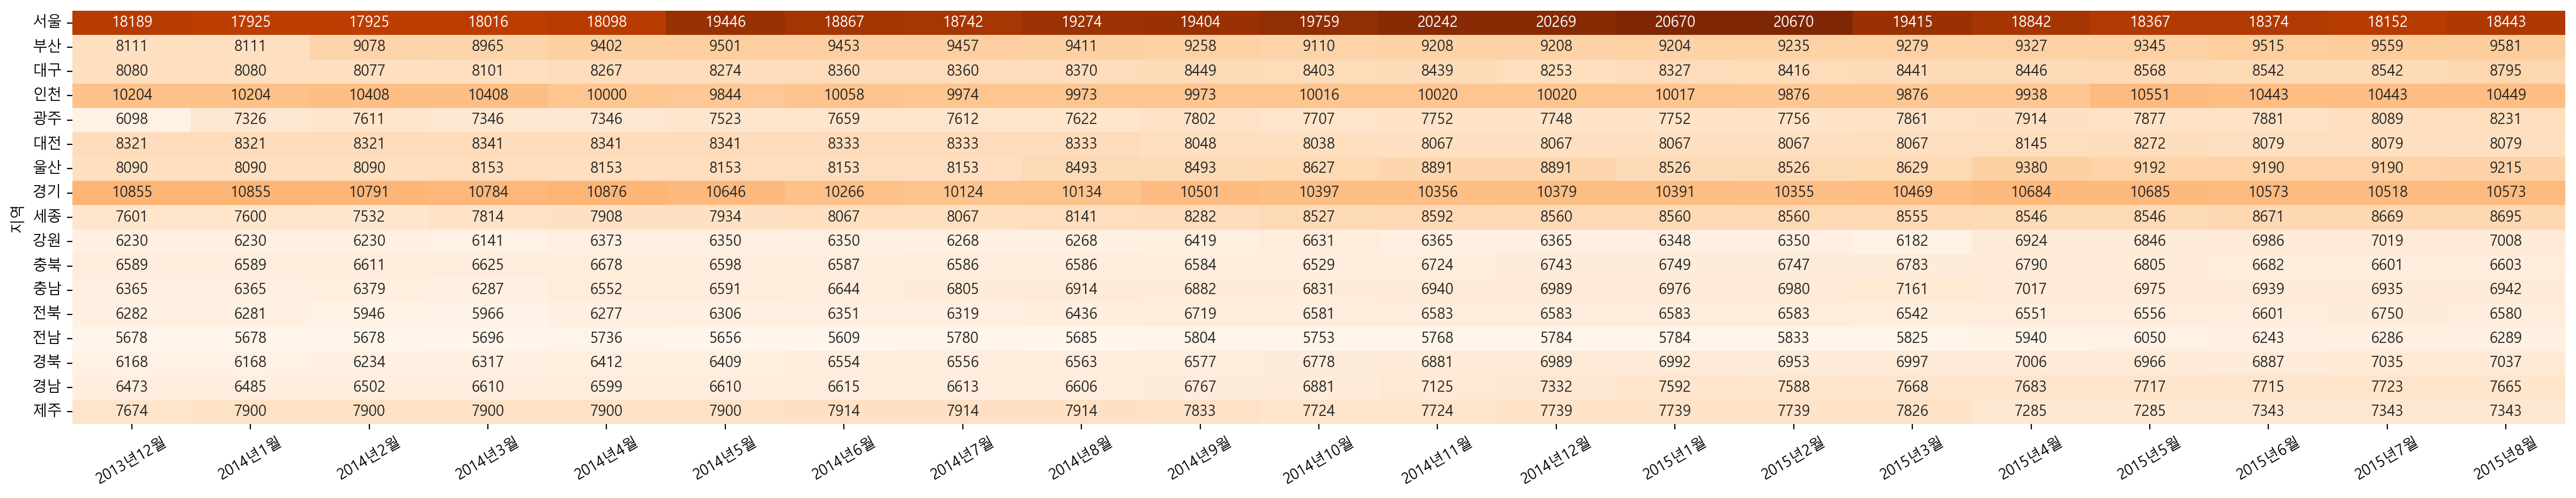

In [11]:
df_first.head()
plt.figure(figsize=(30, 5))
sns.heatmap(df_first, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xticks(rotation=30)
plt.show()

## (2) 2015이후 데이터 분양가격에 간헐적으로 comma(,) 추가하여 csv로 출력
- 분양가격에 np.nan, ' ', '   ', 8111 -> np.nan, ' ', '   ', 8111, "8,111"

In [12]:
#  ★ 
ex = pd.read_csv('c:/ai_x/download/shareData/부동산_250213/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',
                encoding='cp949')
ex.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [13]:
# isna(), isnull() - 결측치 여부
# notnull(), notna() - 결측치가 아닌지 여부
print('전체 갯수 :', ex.shape[0])
print('결측치 아닌 갯수 :', ex['분양가격(제곱미터)'].notna().sum())
print('결측치 갯수 :', ex['분양가격(제곱미터)'].isna().sum())

전체 갯수 : 9095
결측치 아닌 갯수 : 8481
결측치 갯수 : 614


In [14]:
# 분양가격(제곱미터)가 결측치인 행 상위2개
ex[ex['분양가격(제곱미터)'].isnull()].head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터)
368,광주,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
369,광주,전용면적 102제곱미터초과,2016,2,NaN


In [15]:
type(ex.loc[368, '분양가격(제곱미터)']), type(ex.loc[0, '분양가격(제곱미터)'])

(float, str)

In [16]:
# 분양가격(제곱미터) 컬럼의 type을 float64로 타입 변환 : astype(), pd.to_numeric()
# ex['분양가격(제곱미터)'].astype('float64') # 에러 이유 : '  '
# pd.to_numeric(ex['분양가격(제곱미터)'], errors='coerce') # 예러나는 행은 NaN로 
pd.to_numeric(ex['분양가격(제곱미터)'], errors='coerce').isna().sum()

740

In [17]:
# 분양가격(제곱미터) 컬럼이 space인 행 : 740-614=126개
ex[ex['분양가격(제곱미터)'].str.strip() == ''].head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
28,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,


In [18]:
nanex = ex.loc[368] # 분양가격이 결측치
spaceex = ex.loc[28] # 분양가격이 space
ex.loc[0] # 분양가격이 정상

지역명             서울
규모구분          모든면적
연도            2015
월               10
분양가격(제곱미터)    5841
Name: 0, dtype: object

In [19]:
# 분양가격이 nan이거나 space면 0, 그외 분양가격의 문자자리수를 return하는 함수
def get_pricelen(row):
    price = row['분양가격(제곱미터)']
    # np.isnan(스칼라변수) : 스칼라변수가 결측치(np.nan)인지 여부
    # pd.isna(스칼라변수) : 스칼라변수가 결측치(np.nan, None)인지 여부
    # pd.notnull(스칼라변수) : 결측치가 아닌지 여부
    # 1차원이나2차원변수.isna() : 결측치 여부
    if pd.notnull(price) and price.strip()!='':
        return len(price)
    else:
        return 0
    
get_pricelen(nanex), get_pricelen(spaceex), get_pricelen(ex.loc[0])

(0, 0, 4)

In [20]:
#  ★  자리수열 추가
ex['자리수'] = ex.apply(get_pricelen, axis=1)
ex.head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
0,서울,모든면적,2015,10,5841,4
1,서울,전용면적 60제곱미터이하,2015,10,5652,4


In [21]:
ex.자리수.unique()

array([4, 0, 5], dtype=int64)

In [22]:
# index 이름 idx로
ex.index.name = 'idx'
ex.head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
idx,,,,,,
0,서울,모든면적,2015,10,5841,4
1,서울,전용면적 60제곱미터이하,2015,10,5652,4


In [23]:
# ★ index를 열로
ex = ex.reset_index()
ex.head(2)

,idx,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
0,0,서울,모든면적,2015,10,5841,4
1,1,서울,전용면적 60제곱미터이하,2015,10,5652,4


In [24]:
# 자리수가 5이면서 idx가 5의 배수 : 8245번째
ex[(ex.자리수 == 5) & (ex.idx%5==0)].head(1)

,idx,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
8245,8245,서울,모든면적,2023,11,10347,5


In [25]:
# 컴마추가안 함 : nanex, spaceex, ex.loc[1]
# 컴마추가 : ex.loc[0], ex.loc[8245]

In [26]:
nanex = ex.loc[368] # 분양가격이 결측치
spaceex = ex.loc[28] # 분양가격이 space

In [27]:
# 2022년 데이터 흉내내기 위한 함수:매개변수로 row를 받아 nan, ' ', '  ', '5123', '5,123' return
def comma_append(row):
    price = row['분양가격(제곱미터)']
    if (row.idx%5==0) & (row.자리수>=4):
        price = price[:-3] + ',' + price[-3:]
    return price
    
comma_append(nanex), comma_append(spaceex), comma_append(ex.loc[1]),\
comma_append(ex.loc[0]), comma_append(ex.loc[8245])

(nan, '  ', '5652', '5,841', '10,347')

In [28]:
# ★ 컴마 추가 - 1번만 실행
ex['분양가격(제곱미터)'] = ex.apply(comma_append, axis=1)

In [29]:
ex.head(6)

,idx,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
0,0,서울,모든면적,2015,10,"5,841",4
1,1,서울,전용면적 60제곱미터이하,2015,10,5652,4
2,2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,4
3,3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,4
4,4,서울,전용면적 102제곱미터초과,2015,10,5879,4
5,5,인천,모든면적,2015,10,"3,163",4


In [30]:
ex.drop(['idx', '자리수'], axis=1, inplace=True)
ex

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,"5,841"
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879
...,...,...,...,...,...
9090,제주,모든면적,2024,8,"7,703"
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN


In [31]:
# 간헐적으로 평당분양가에 ,가 있거나(5개마다) np.nan이 있거나 space가 있는 데이터 csv로 백업
ex.to_csv('data/전국제곱미터당분양가격(2015년10월부터).csv', index=False)

## (3) 이후 데이터는 df_last 변수에 담아 탐색

In [32]:
df_last = pd.read_csv('data/전국제곱미터당분양가격(2015년10월부터).csv')
display(df_last.head(1))
print(df_last.shape)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,"5,841"


(9095, 5)


In [33]:
# 데이터 요약하기
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9095 non-null   object
 1   규모구분        9095 non-null   object
 2   연도          9095 non-null   int64 
 3   월           9095 non-null   int64 
 4   분양가격(제곱미터)  8481 non-null   object
dtypes: int64(2), object(3)
memory usage: 355.4+ KB


# 3. df_last의 데이터 결측치를 확인하고 대체 고민

In [34]:
# 열별 결측치 갯수
df_last.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    614
dtype: int64

In [35]:
# 열별 결측치를 제외한 갯수
df_last.notna().sum()

지역명           9095
규모구분          9095
연도            9095
월             9095
분양가격(제곱미터)    8481
dtype: int64

# 4. df_last 데이셋에 평당분양가격컬럼 추가

## (1) astype('float')나 pd.to_numeric() 사용
## (2) 6,222 => 6222 수정, space가 저장된 경우 nan으로 수정하는 함수를 apply나 map적용
## (3) df_last['분양가격(제곱미터)']*3.3

In [36]:
# df_last['분양가격(제곱미터)'].str.replace(',','').astype(np.float64)
# ,와 space 때문에 에러

# pd.to_numeric(df_last['분양가격(제곱미터)'], errors='coerce') # 비추





### apply

In [37]:
# 콤마가 있는 문자에서 콤마 없애기 방법1
temp = '12,523'
temp.replace(',', '')

'12523'

In [38]:
# 콤마가 있는 문자에서 콤마 없애기 방법2
temp = '12,523'
tempsplited = temp.split(',')
print(tempsplited)
print(''.join(tempsplited))

['12', '523']
12523


In [39]:
# 분양가격 컬럼에 콤마(,)가 있는 경우 콤마(,)를 제거('5,123' -> '5123')
# 공백문자가 있는 경우 np.nan로 바꾸는 함수
def commadrop(row):
    # pd.options.mode.copy_on_write = True
    row = row.copy()
    price = row['분양가격(제곱미터)']
    if pd.isna(price): # np.nan이거나 None 인지 여부
        row['제곱미터분양가격'] = np.nan
    elif price.strip() == '': # space면 np.nan
        row['제곱미터분양가격'] = np.nan
    elif price.find(',')!=-1: # 콤마가 있으면 콤마 없애기
        # row['분양가격(제곱미터)'] = price.replace(',','')
        row['제곱미터분양가격'] = ''.join(price.split(','))
    else:
        row['제곱미터분양가격'] = price
    return row

commadrop(df_last.loc[0]) # 콤마 제외
commadrop(df_last.loc[1]) # 그대로
commadrop(df_last.loc[28]) # 공백문자의 경우 nan
commadrop(df_last.loc[368]) # nan의 경우 nan

지역명                                광주
규모구분          전용면적 85제곱미터초과 102제곱미터이하
연도                               2016
월                                   2
분양가격(제곱미터)                        NaN
제곱미터분양가격                          NaN
Name: 368, dtype: object

In [40]:
# 공백문자는 결측치로, 콤마는 제거하기를 모든 행에 적용
df_last = df_last.apply(commadrop, axis=1)
df_last.head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터분양가격
0,서울,모든면적,2015,10,"5,841",5841
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652


In [41]:
df_last['제곱미터분양가격'] = df_last['제곱미터분양가격'].astype(np.float64)

In [42]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8481 non-null   object 
 5   제곱미터분양가격    8355 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 426.5+ KB


### map

In [43]:
df_last.drop(['제곱미터분양가격'], axis=1, inplace=True)
df_last.sample(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
3763,대구,전용면적 85제곱미터초과 102제곱미터이하,2019,6,4127


In [44]:
# 결측치->결측치 return, 공백문자->결측치 return, '3,198' -> 3198 return, '3198'->3198 return,  
def commadrop2(price):
    # if price is np.nan:
    # if np.isnan(price):
    if pd.isna(price):
        return np.nan
    elif price.strip() == '':
        return np.nan
    elif price.find(',') != -1:
        return int(price.replace(',',''))
    else:
        return int(price)
        

commadrop2(df_last.loc[0, '분양가격(제곱미터)']) # 콤마제외한 문자를 숫자로 
# commadrop2(df_last.loc[1, '분양가격(제곱미터)']) # 콤마없는 문자를 숫자로 
# commadrop2(df_last.loc[28, '분양가격(제곱미터)']) # 공백문자를 nan
# commadrop2(df_last.loc[368, '분양가격(제곱미터)']) # nan을 nan

5841

- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [45]:
#df_last['분양가격(제곱미터)'].apply(commadrop2)
df_last['제곱미터당분양가격'] = df_last['분양가격(제곱미터)'].map(commadrop2)
df_last.tail()

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격
9090,제주,모든면적,2024,8,"7,703",7703.0
9091,제주,전용면적 60제곱미터이하,2024,8,NaN,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515,7515.0
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,NaN
9094,제주,전용면적 102제곱미터초과,2024,8,7950,7950.0


In [46]:
df_last.dtypes

지역명            object
규모구분           object
연도              int64
월               int64
분양가격(제곱미터)     object
제곱미터당분양가격     float64
dtype: object

In [47]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격
0,서울,모든면적,2015,10,"5,841",5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0


In [48]:
df_last['평당분양가격'] = df_last['제곱미터당분양가격']*3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격,평당분양가격
0,서울,모든면적,2015,10,"5,841",5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7


In [49]:
df_last['평당분양가격'] = df_last['제곱미터당분양가격']*3.3
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격,평당분양가격
0,서울,모든면적,2015,10,"5,841",5841.0,19275.3


# 5. df_last 데이터셋에서 전용면적 컬럼을 추가한다
- 전용면적 컬럼, 필요없는 컬럼 처리로 메모리 절약

In [50]:
df_last.info() # 497.5 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8481 non-null   object 
 5   제곱미터당분양가격   8355 non-null   float64
 6   평당분양가격      8355 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 497.5+ KB


In [51]:
# 규모구분 칼럼을 중복단어를 제외하고 전용면적 칼럼으로
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적','')\
                .str.replace('제곱미터','㎡')\
                .str.replace('초과','~')\
                .str.replace('이하','').str.replace(' ','')
df_last['전용면적']

0           모든면적
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
9090        모든면적
9091         60㎡
9092     60㎡~85㎡
9093    85㎡~102㎡
9094       102㎡~
Name: 전용면적, Length: 9095, dtype: object

In [52]:
print(df_last['규모구분'].unique())
print(df_last['전용면적'].unique())

['모든면적' '전용면적 60제곱미터이하' '전용면적 60제곱미터초과 85제곱미터이하' '전용면적 85제곱미터초과 102제곱미터이하'
 '전용면적 102제곱미터초과']
['모든면적' '60㎡' '60㎡~85㎡' '85㎡~102㎡' '102㎡~']


# 6. 메모리 사용량을 줄이기 위해 불필요한 컬럼 제거

In [53]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8481 non-null   object 
 5   제곱미터당분양가격   8355 non-null   float64
 6   평당분양가격      8355 non-null   float64
 7   전용면적        9095 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 568.6+ KB


In [54]:
df_last.drop(['규모구분', '분양가격(제곱미터)', '제곱미터당분양가격'], axis=1, inplace=True)

In [55]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     9095 non-null   object 
 1   연도      9095 non-null   int64  
 2   월       9095 non-null   int64  
 3   평당분양가격  8355 non-null   float64
 4   전용면적    9095 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 355.4+ KB


In [56]:
df_last.to_csv('data/df_last.csv', index=False) # 전처리 단계 백업

In [57]:
# 컬럼명 오타 수정
df_last.rename(columns={'평당분야가격': '평당분양가격'}, inplace=True)


# 7. 데이터 집계
- GroupBy(unstack()함수 이용) vs. pivot_table()
- GroupBy가 조금 시간이 적게 걸릴 수 있음
- 우선 결측치 대체전 데이터 집계와 시각화를 할 예정

- df_last.groupby(["인덱스로사용할컬럼명"])["계산할컬럼명"].연산함수()
- df_last.pivot_table(index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")
- pd.pivot_table(df_last, index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")

## (1) 지역별 데이터수

In [58]:
# 지역명별 데이터 행수(결측치 포함)를 출력
df_last['지역명'].value_counts()

서울    535
강원    535
경남    535
경북    535
전남    535
전북    535
충남    535
충북    535
세종    535
인천    535
울산    535
대전    535
광주    535
대구    535
부산    535
경기    535
제주    535
Name: 지역명, dtype: int64

In [59]:
# 지역명별 데이터(결측치 제외)
# df_last.groupby('지역명')['평당분양가격'].count().to_frame()
# df_last.groupby('지역명')[['평당분양가격']].count()
# df_last.groupby('지역명', as_index=False)[['평당분양가격']].count() # 지역명이 컬럼
# df_last.groupby('지역명')[['평당분양가격']].count().reset_index() # 지역명이 컬럼
df_last.groupby('지역명')['평당분양가격'].count().to_frame().T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,523,535,516,511,450,495,415,533,527,409,395,531,507,520,439,516,533


In [60]:
# pivot_table 이용 : 결과는 데이터프레임
df_last.pivot_table(index='지역명',
                    values='평당분양가격',
                    aggfunc='count').T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,523,535,516,511,450,495,415,533,527,409,395,531,507,520,439,516,533


## (2) 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [61]:
# 지역별 평당분양가격 최대값
# df_last.groupby('지역명')['평당분양가격'].max().sort_values(ascending=False) # 1차원
df_last.groupby('지역명')[['평당분양가격']].max().sort_values(by='평당분양가격',ascending=False) # 2차원

,평당분양가격
지역명,
서울,61917.9
인천,54723.9
부산,31904.4
대전,30851.7
대구,30600.9
울산,27815.7
제주,27753.0
광주,24951.3
경기,24172.5


In [62]:
df_last.groupby('지역명')['평당분양가격'].describe() # 1차원
df_last.groupby('지역명')[['평당분양가격']].describe() # 2차원

평당분양가격                                                           \
     count          mean          std      min        25%       50%   
지역명                                                                   
강원   523.0  10078.717400  2828.907867   6639.6   7652.700   9428.10   
경기   535.0  15420.030280  3245.863323  10160.7  13274.250  14652.00   
경남   516.0  10776.955814  2223.562736   7260.0   9187.200  10254.75   
경북   511.0  10261.553425  2276.026239   6949.8   8378.700   9705.30   
광주   450.0  12998.216000  3637.557312   7428.3   9554.325  12673.65   
대구   495.0  14434.520000  3407.303427   8259.9  11949.300  14711.40   
대전   415.0  12829.565060  4191.685609   8002.5   9401.700  11820.60   
부산   533.0  14896.949156  4059.939958   9669.0  12467.400  13411.20   
서울   527.0  27755.404554  6566.391764  16701.3  22497.750  26763.00   
세종   409.0  10741.830807  1638.790167   8487.6   9101.400  10523.70   
울산   395.0  13958.197975  4060.178889   7992.6  10312.500  13827.00   
인천   531.0  14513.232203  3999.854344   9537.0  11398.200  14652.00   
전남   507.0   9224.326627  2092.041133   6289.8   7613.100   8669.10   
전북   520.0   8886.201923  1660.650118   6270.0   7661.775   8679.00   
제주   439.0  15912.434624  6039.013382   7342.5  10645.800  13500.30   
충남   516.0   9769.541279  2000.592843   6926.7   8141.100   9124.50   
충북   533.0   8896.583302  1769.454740   6164.4   7543.800   8596.50   

                         
           75%      max  
지역명                      
강원   11873.400  17806.8  
경기   17168.250  24172.5  
경남   12031.800  16566.0  
경북   12500.400  15345.0  
광주   15213.000  24951.3  
대구   16338.300  30600.9  
대전   15310.350  30851.7  
부산   17301.900  31904.4  
서울   31054.650  61917.9  
세종   12266.100  21087.0  
울산   17602.200  27815.7  
인천   16214.550  54723.9  
전남   10627.650  15087.6  
전북    9986.625  14774.1  
제주   21908.700  27753.0  
충남   11740.575  14932.5  
충북    9906.600  13685.1

In [63]:
# 지역별 평당분양가의 최대값, 평균값, 통계요약정보를 출력(pivot_table)
df_last.pivot_table(index='지역명',
                    values='평당분양가격',
                    aggfunc='max')

df_last.pivot_table(index='지역명',
                    values='평당분양가격',
                    aggfunc='mean')

df_last.pivot_table(index='지역명',
                    values='평당분양가격',
                    aggfunc='describe').applymap(lambda x : round(x,1))

,25%,50%,75%,count,max,mean,min,std
지역명,,,,,,,,
강원,7652.7,9428.1,11873.4,523.0,17806.8,10078.7,6639.6,2828.9
경기,13274.2,14652.0,17168.2,535.0,24172.5,15420.0,10160.7,3245.9
경남,9187.2,10254.8,12031.8,516.0,16566.0,10777.0,7260.0,2223.6
경북,8378.7,9705.3,12500.4,511.0,15345.0,10261.6,6949.8,2276.0
광주,9554.3,12673.6,15213.0,450.0,24951.3,12998.2,7428.3,3637.6
대구,11949.3,14711.4,16338.3,495.0,30600.9,14434.5,8259.9,3407.3
대전,9401.7,11820.6,15310.3,415.0,30851.7,12829.6,8002.5,4191.7
부산,12467.4,13411.2,17301.9,533.0,31904.4,14896.9,9669.0,4059.9
서울,22497.8,26763.0,31054.6,527.0,61917.9,27755.4,16701.3,6566.4


## (3) 전용면적별 평당분양가격(평균)

In [64]:
df_last.groupby('전용면적')[['평당분양가격']].mean().sort_values(by='평당분양가격') # 2차원

,평당분양가격
전용면적,
60㎡,12522.774427
60㎡~85㎡,12619.048827
모든면적,12654.068098
85㎡~102㎡,13447.672835
102㎡~,14066.826846


In [65]:
df_last.pivot_table(index='전용면적',
                    values='평당분양가격',
                    aggfunc='mean').applymap(lambda x : round(x,1))

,평당분양가격
전용면적,
102㎡~,14066.8
60㎡,12522.8
60㎡~85㎡,12619.0
85㎡~102㎡,13447.7
모든면적,12654.1


## (4) 지역별, 전용면적별 평당분양가격(평균)

In [66]:
r = df_last.groupby( ['지역명', '전용면적'] )['평당분양가격'].mean()
print(r['서울'])
print(r[('서울', '모든면적')])

전용면적
102㎡~       29035.948515
60㎡         27371.156075
60㎡~85㎡     26662.612150
85㎡~102㎡    28972.177143
모든면적        26829.678505
Name: 평당분양가격, dtype: float64
26829.678504672895


In [67]:
r = df_last.groupby( ['지역명', '전용면적'] )[['평당분양가격']].mean()
r

평당분양가격
지역명 전용면적                  
강원  102㎡~     11314.805607
    60㎡        9441.885981
    60㎡~85㎡    9383.472897
    85㎡~102㎡  10795.481053
    모든면적       9538.326168
...                    ...
충북  102㎡~      9369.532710
    60㎡        8598.227103
    60㎡~85㎡    8558.503738
    85㎡~102㎡   9418.420000
    모든면적       8547.986916

[85 rows x 1 columns]

In [68]:
r = df_last.groupby( ['지역명', '전용면적'] )['평당분양가격'].mean()
# 2차원 index중 level0 인덱스는 그대로, level1 인덱스를 컬럼으로 올리면
r.unstack().round()

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,모든면적
지역명,,,,,
강원,11315.0,9442.0,9383.0,10795.0,9538.0
경기,16559.0,15291.0,14787.0,15740.0,14723.0
경남,11522.0,10122.0,10108.0,12151.0,10147.0
경북,11061.0,9732.0,9828.0,10968.0,9857.0
광주,14749.0,12254.0,12656.0,12292.0,12798.0
대구,15564.0,13748.0,14494.0,13714.0,14517.0
대전,17662.0,11834.0,11920.0,13003.0,11948.0
부산,15741.0,14449.0,14745.0,14801.0,14765.0
서울,29036.0,27371.0,26663.0,28972.0,26830.0


In [69]:
df_last.pivot_table(index=['지역명','전용면적'],
                    values='평당분양가격').unstack()

평당분양가격                                                        
전용면적         102㎡~           60㎡       60㎡~85㎡      85㎡~102㎡          모든면적
지역명                                                                       
강원    11314.805607   9441.885981   9383.472897  10795.481053   9538.326168
경기    16559.091589  15291.151402  14787.207477  15739.920561  14722.780374
경남    11522.478000  10122.231429  10107.838318  12150.634021  10146.513084
경북    11060.616346   9731.888571   9828.325234  10968.300000   9856.637383
광주    14749.190323  12254.043564  12655.962617  12291.714286  12798.356075
대구    15564.029412  13748.378351  14494.393269  13713.937500  14516.541346
대전    17662.047458  11834.224752  11920.124299  13002.643902  11947.572897
부산    15741.408571  14448.602804  14744.955140  14801.024299  14764.539252
서울    29035.948515  27371.156075  26662.612150  28972.177143  26829.678505
세종    10684.533750  10776.462162  10775.270000  10600.012500  10840.996774
울산    14809.050000  13624.088372  13520.403061  15303.785106  13470.835714
인천    16266.597087  13847.139252  13879.183178  14741.994393  13896.793458
전남    10206.869159   9104.605714   8928.350467   8807.822222   8970.541121
전북     9448.054206   8531.055446   8623.794393   9169.757143   8662.284112
제주    16770.922826  14971.028571  16070.599065  14679.460714  16338.885981
충남    10379.433333   9231.086916   9418.292523  10818.775000   9153.583178
충북     9369.532710   8598.227103   8558.503738   9418.420000   8547.986916

In [70]:
r = df_last.pivot_table(index='지역명',
                    columns='전용면적',
                    values='평당분양가격',
                    # aggfunc='mean'
                    )

r = r[['60㎡', '60㎡~85㎡', '85㎡~102㎡', '102㎡~', '모든면적']]
r

전용면적,60㎡,60㎡~85㎡,85㎡~102㎡,102㎡~,모든면적
지역명,,,,,
강원,9441.885981,9383.472897,10795.481053,11314.805607,9538.326168
경기,15291.151402,14787.207477,15739.920561,16559.091589,14722.780374
경남,10122.231429,10107.838318,12150.634021,11522.478000,10146.513084
경북,9731.888571,9828.325234,10968.300000,11060.616346,9856.637383
광주,12254.043564,12655.962617,12291.714286,14749.190323,12798.356075
대구,13748.378351,14494.393269,13713.937500,15564.029412,14516.541346
대전,11834.224752,11920.124299,13002.643902,17662.047458,11947.572897
부산,14448.602804,14744.955140,14801.024299,15741.408571,14764.539252
서울,27371.156075,26662.612150,28972.177143,29035.948515,26829.678505


<Axes: xlabel='전용면적', ylabel='지역명'>

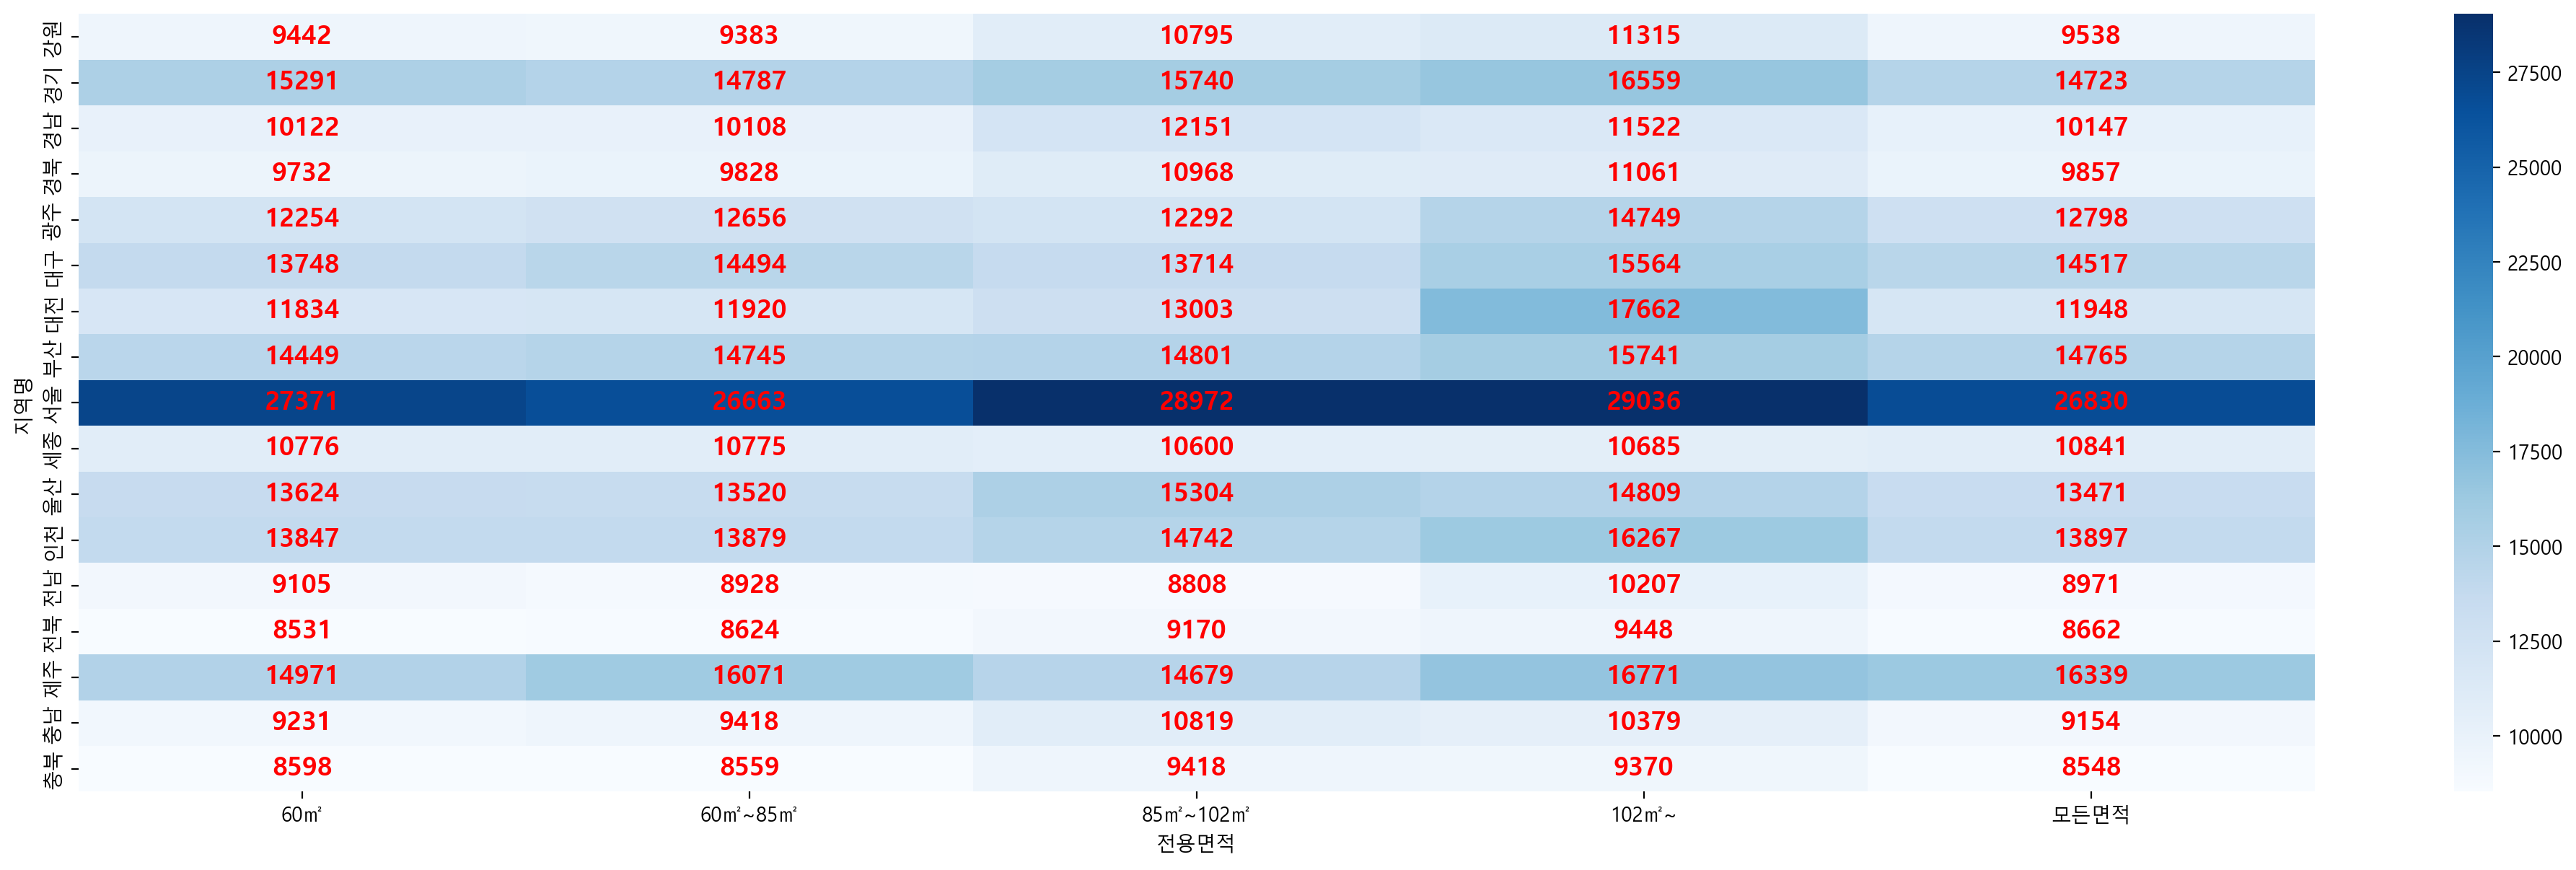

In [71]:
plt.figure(figsize=(25, 7))
sns.heatmap(r, cmap='Blues', annot=True, fmt='.0f',
            annot_kws={'size':13, 'weight':'bold', 'color':'red'})

## (5) 연도, 지역별 평당분양가격(평균)

In [72]:
df_last.groupby(['연도', '지역명'])['평당분양가격'].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.940,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400000,20315.680000,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800000
2016,7162.903846,11684.970,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535000,21753.435000,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335000
2017,7318.850000,12296.185,8806.600000,8288.063793,9599.700000,12191.972222,9912.910526,11637.615000,21864.095000,9132.945763,10630.160870,11672.430000,7413.230000,7406.126316,12628.539623,8157.315517,7462.565000
2018,8219.255000,14258.420,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965000,23202.245000,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295000
2019,8934.475000,15665.540,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865000,28286.830000,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875000
2020,10302.423214,15106.080,10919.272222,9997.693750,13406.485714,15314.200000,11238.844737,13353.010000,29781.015000,11628.100000,12837.600000,14982.990000,9562.398214,8559.430000,14192.876923,9139.380000,8358.956897
2021,10291.325000,14567.080,11302.335000,11227.150000,13709.850000,15586.285000,11994.216667,14317.655000,29380.450000,12578.060000,14191.953061,15774.330000,9980.760000,9047.928814,22302.342857,9860.741379,8822.385000
2022,11644.215000,16621.550,12455.685000,12018.050000,15095.885106,16821.915000,14113.880000,18166.835593,29128.531034,11309.971698,17903.751724,17341.830000,10635.508475,10003.070000,18953.825000,11730.345000,10033.540000
2023,13409.385000,20175.210,13283.182759,13025.320000,17957.852830,17656.747059,17917.288889,20470.850847,33230.560000,12278.200000,18832.093220,16150.695000,11846.682692,10966.024528,24095.901923,12580.590000,11103.950000


In [73]:
df_last.pivot_table

df_last.pivot_table(index='연도',
                    columns='지역명',
                    values='평당분양가격',
                    #aggfunc='mean',
                    )

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.940,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400000,20315.680000,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800000
2016,7162.903846,11684.970,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535000,21753.435000,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335000
2017,7318.850000,12296.185,8806.600000,8288.063793,9599.700000,12191.972222,9912.910526,11637.615000,21864.095000,9132.945763,10630.160870,11672.430000,7413.230000,7406.126316,12628.539623,8157.315517,7462.565000
2018,8219.255000,14258.420,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965000,23202.245000,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295000
2019,8934.475000,15665.540,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865000,28286.830000,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875000
2020,10302.423214,15106.080,10919.272222,9997.693750,13406.485714,15314.200000,11238.844737,13353.010000,29781.015000,11628.100000,12837.600000,14982.990000,9562.398214,8559.430000,14192.876923,9139.380000,8358.956897
2021,10291.325000,14567.080,11302.335000,11227.150000,13709.850000,15586.285000,11994.216667,14317.655000,29380.450000,12578.060000,14191.953061,15774.330000,9980.760000,9047.928814,22302.342857,9860.741379,8822.385000
2022,11644.215000,16621.550,12455.685000,12018.050000,15095.885106,16821.915000,14113.880000,18166.835593,29128.531034,11309.971698,17903.751724,17341.830000,10635.508475,10003.070000,18953.825000,11730.345000,10033.540000
2023,13409.385000,20175.210,13283.182759,13025.320000,17957.852830,17656.747059,17917.288889,20470.850847,33230.560000,12278.200000,18832.093220,16150.695000,11846.682692,10966.024528,24095.901923,12580.590000,11103.950000


<Axes: xlabel='전용면적', ylabel='지역명'>

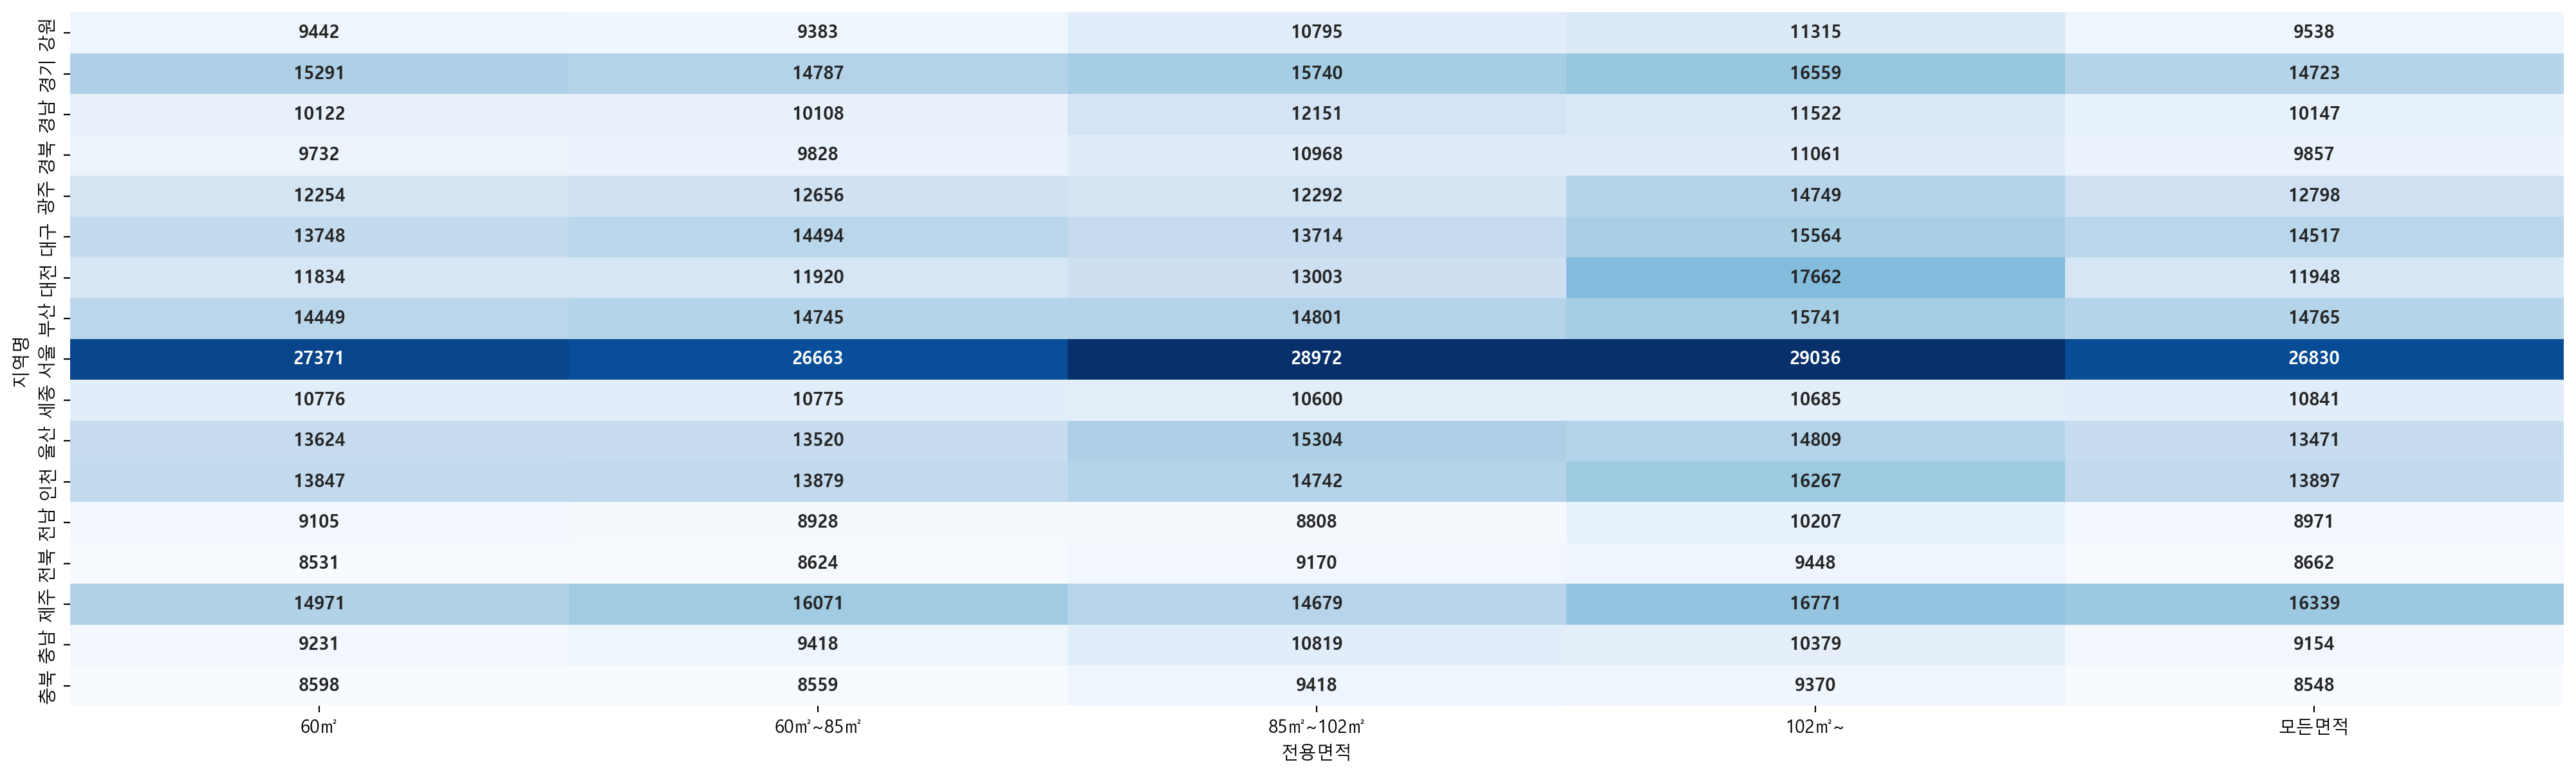

In [74]:
plt.figure(figsize=(25, 7))
sns.heatmap(r, annot=True, fmt='.0f', cmap='Blues',
            annot_kws={'weight':'bold'},
            cbar=False)

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

# 8. matplotlib으로 시각화(위의 도표)
https://www.research.autodesk.com/publications/same-stats-different-graphs/
## (1) 지역별 결측치를 제외한 데이터수(line, bar)

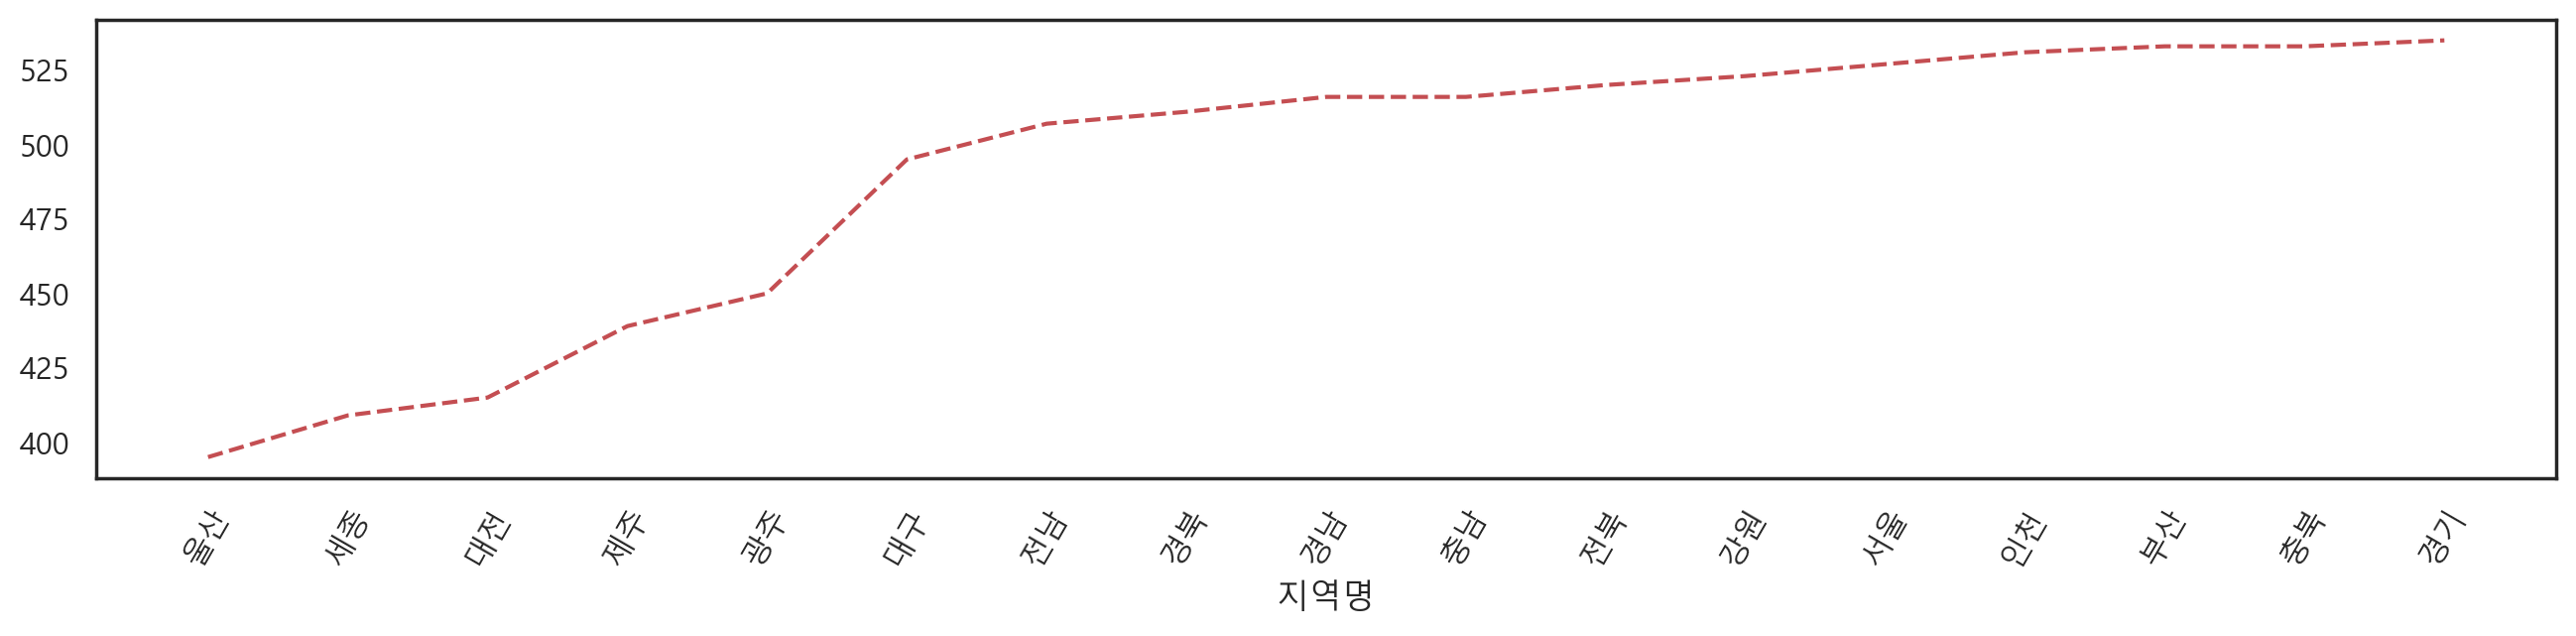

In [98]:
result = df_last.groupby('지역명')['평당분양가격'].count().sort_values()
# result.plot(kind='line')
ax = result.plot.line(figsize=(16, 3), color='r', linestyle='--')
ax.set_xticks(range(len(result)))
ax.set_xticklabels(result.index, rotation=60)
plt.show()

<Axes: xlabel='지역명'>

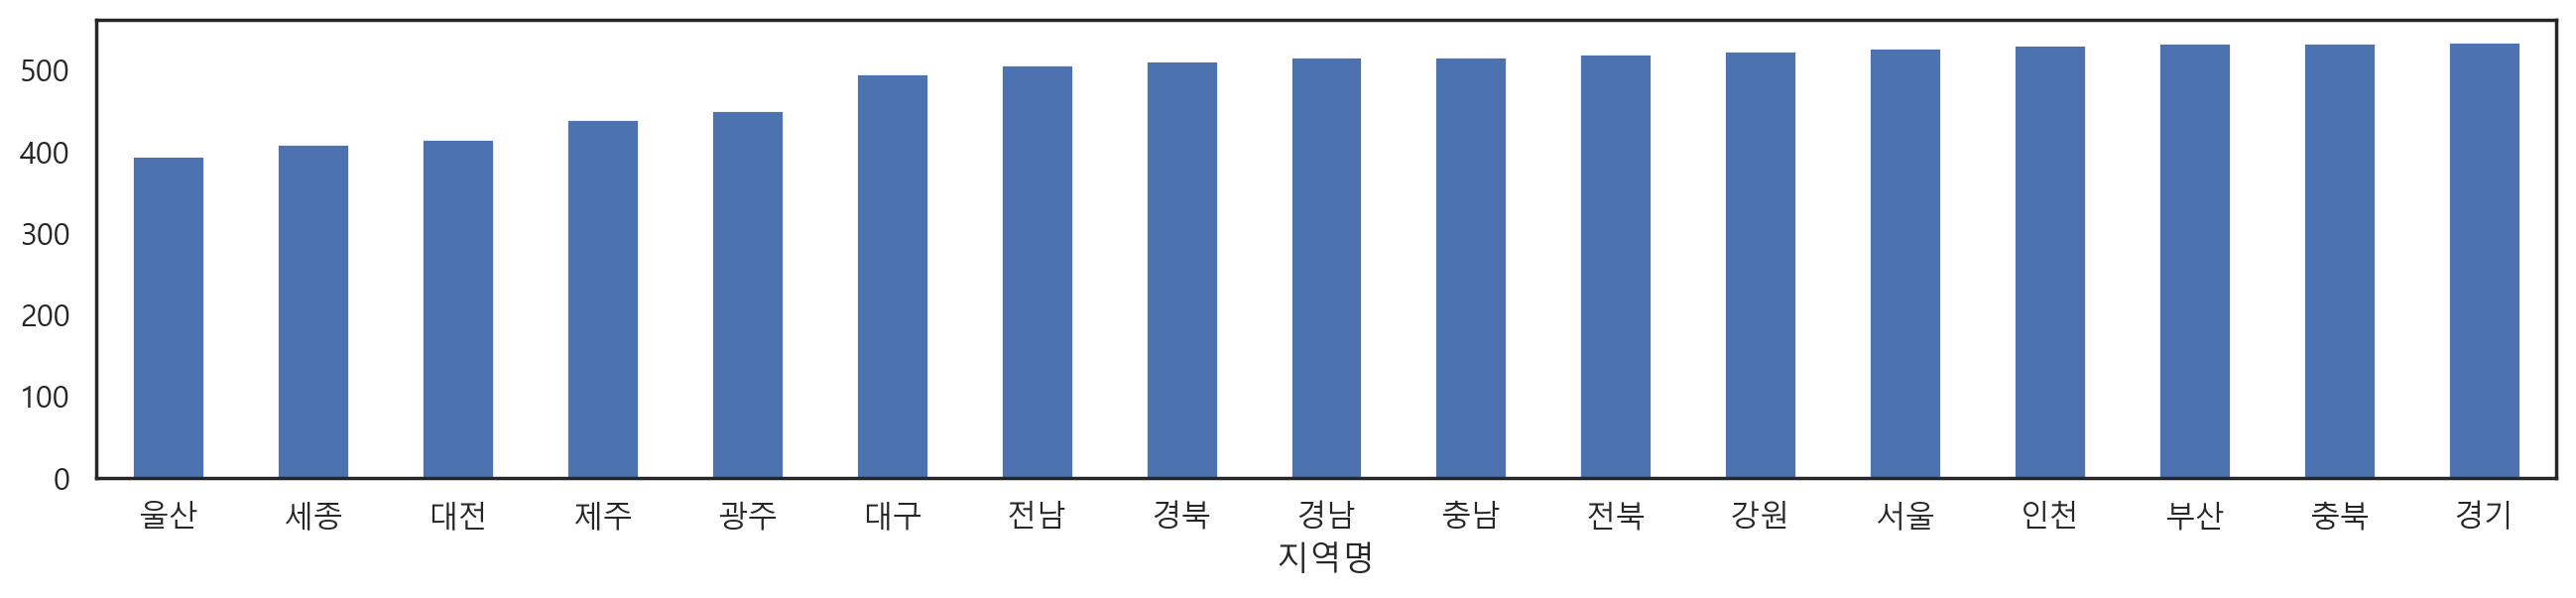

In [102]:
result.plot.bar()
result.plot(kind='bar', figsize=(16,3), rot=0)

## (2) 지역별 평당분양가격 (line, bar)

<Axes: xlabel='지역명'>

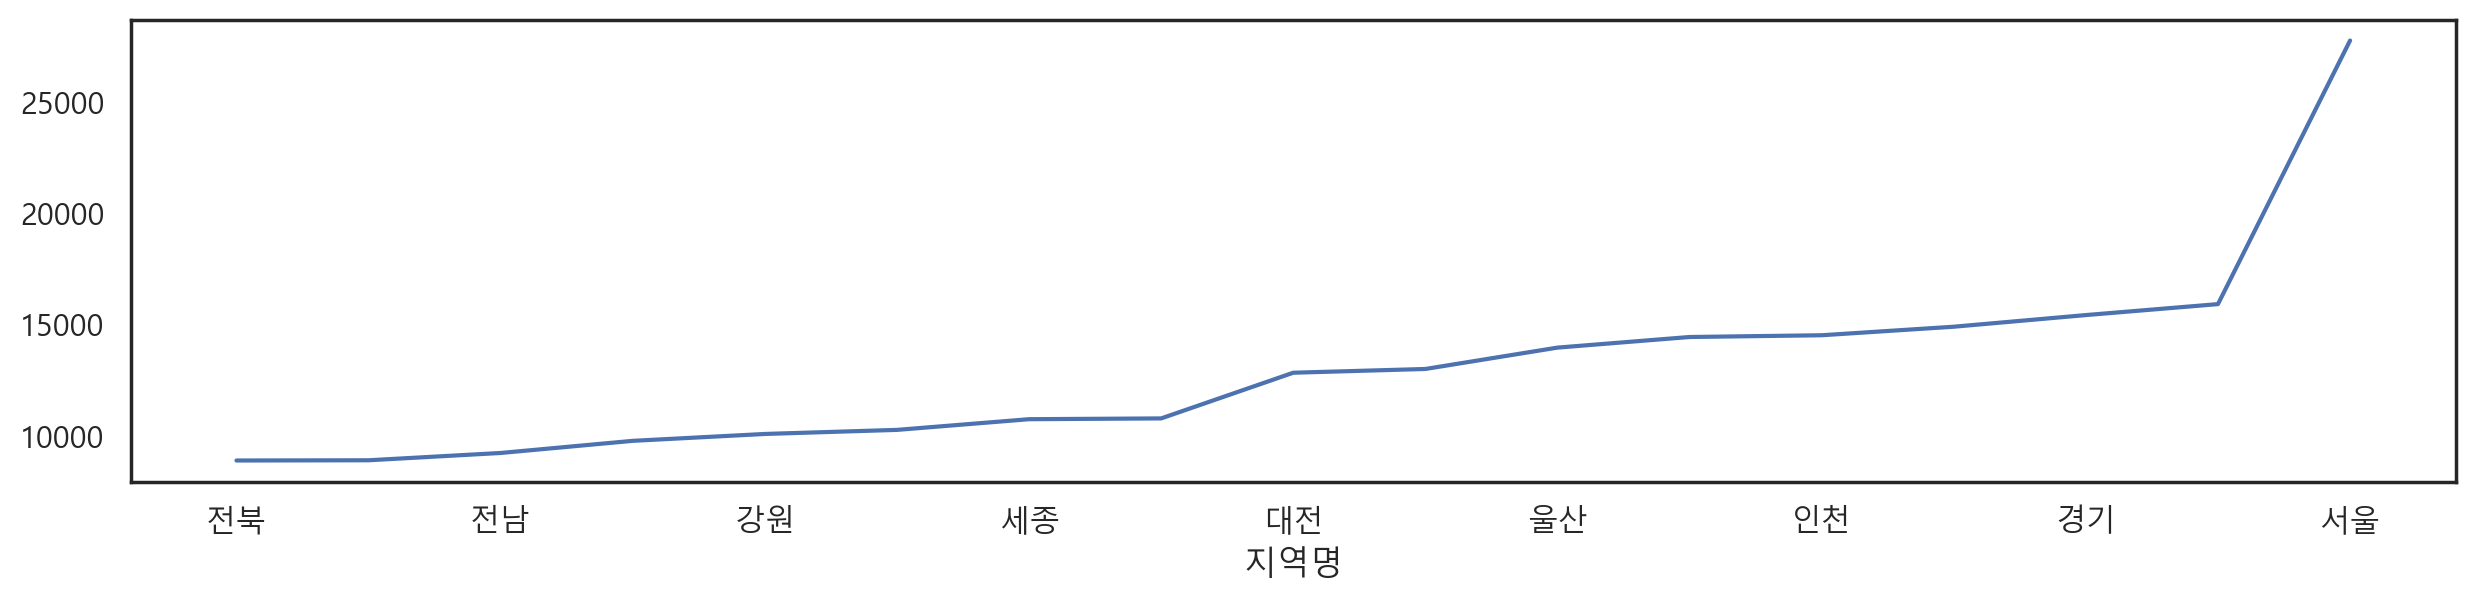

In [107]:
df_last.groupby('지역명')['평당분양가격'].mean().sort_values().plot(kind='line', figsize=(15,3))

<Axes: xlabel='지역명'>

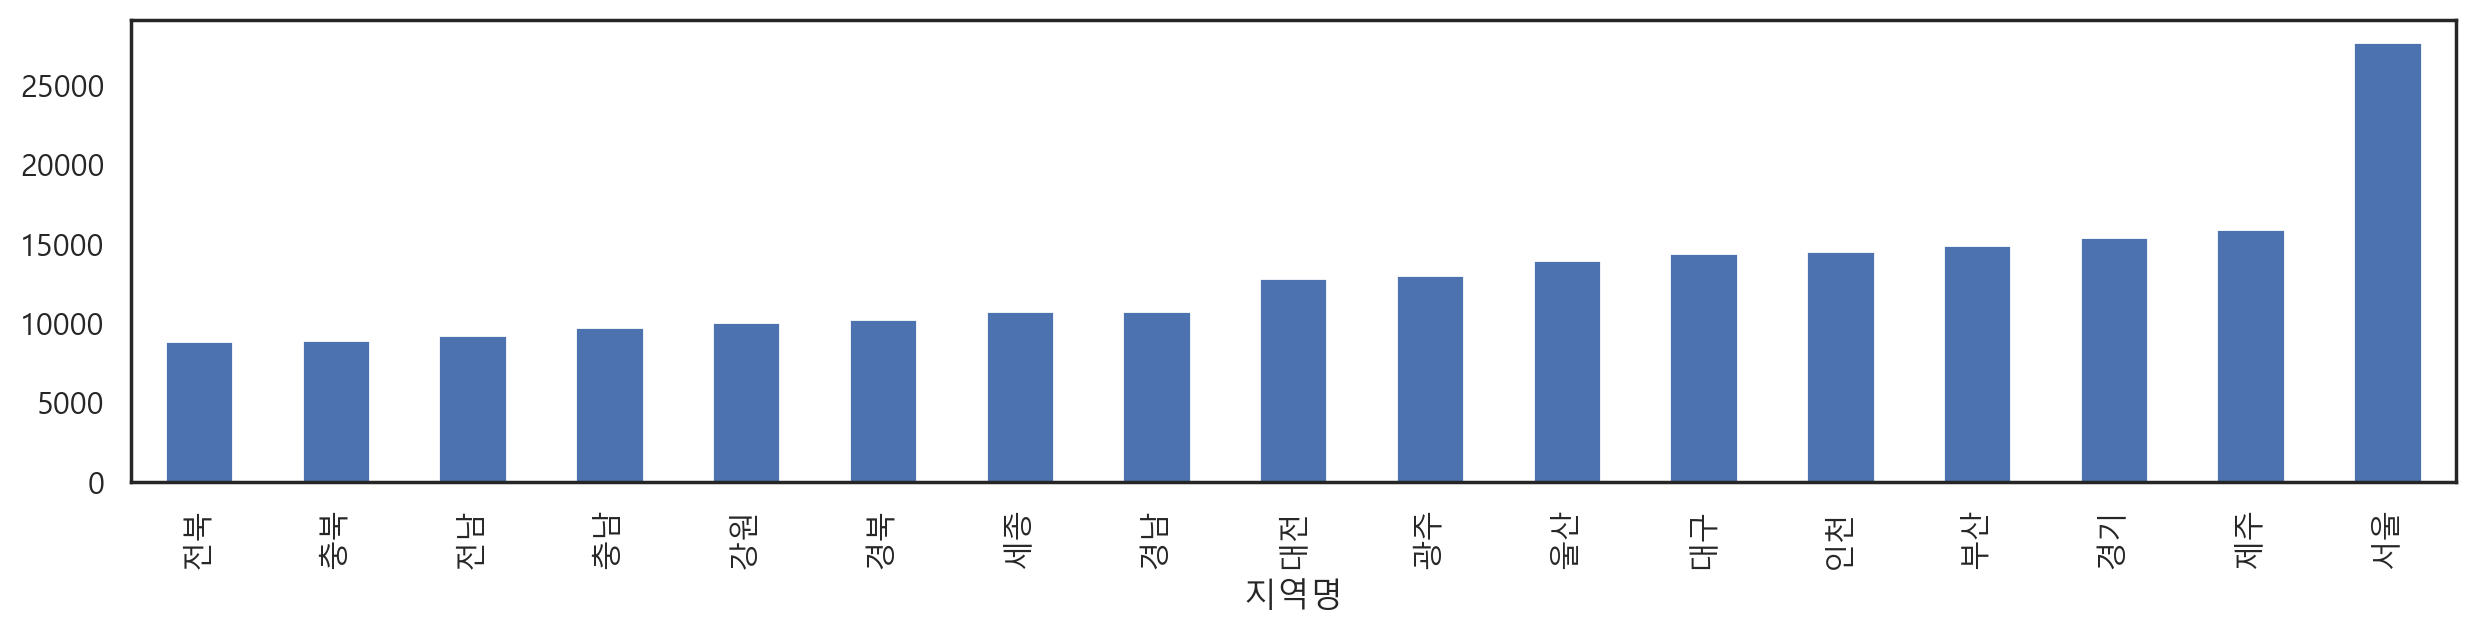

In [108]:
df_last.groupby('지역명')['평당분양가격'].mean().sort_values().plot(kind='bar', figsize=(15,3))

## (3) 전용면적별 평당분양가격(barplot)

In [ ]:
result = df_last.groupby('전용면적')['평당분양가격'].mean().sort_values()
result

전용면적
60㎡         12522.774427
60㎡~85㎡     12619.048827
모든면적        12654.068098
85㎡~102㎡    13447.672835
102㎡~       14066.826846
Name: 평당분양가격, dtype: float64

In [122]:
for idx, val in enumerate(result):
    print(idx,val)

0 12522.77442680776
1 12619.048826815642
2 12654.068098159509
3 13447.67283519553
4 14066.826845637583


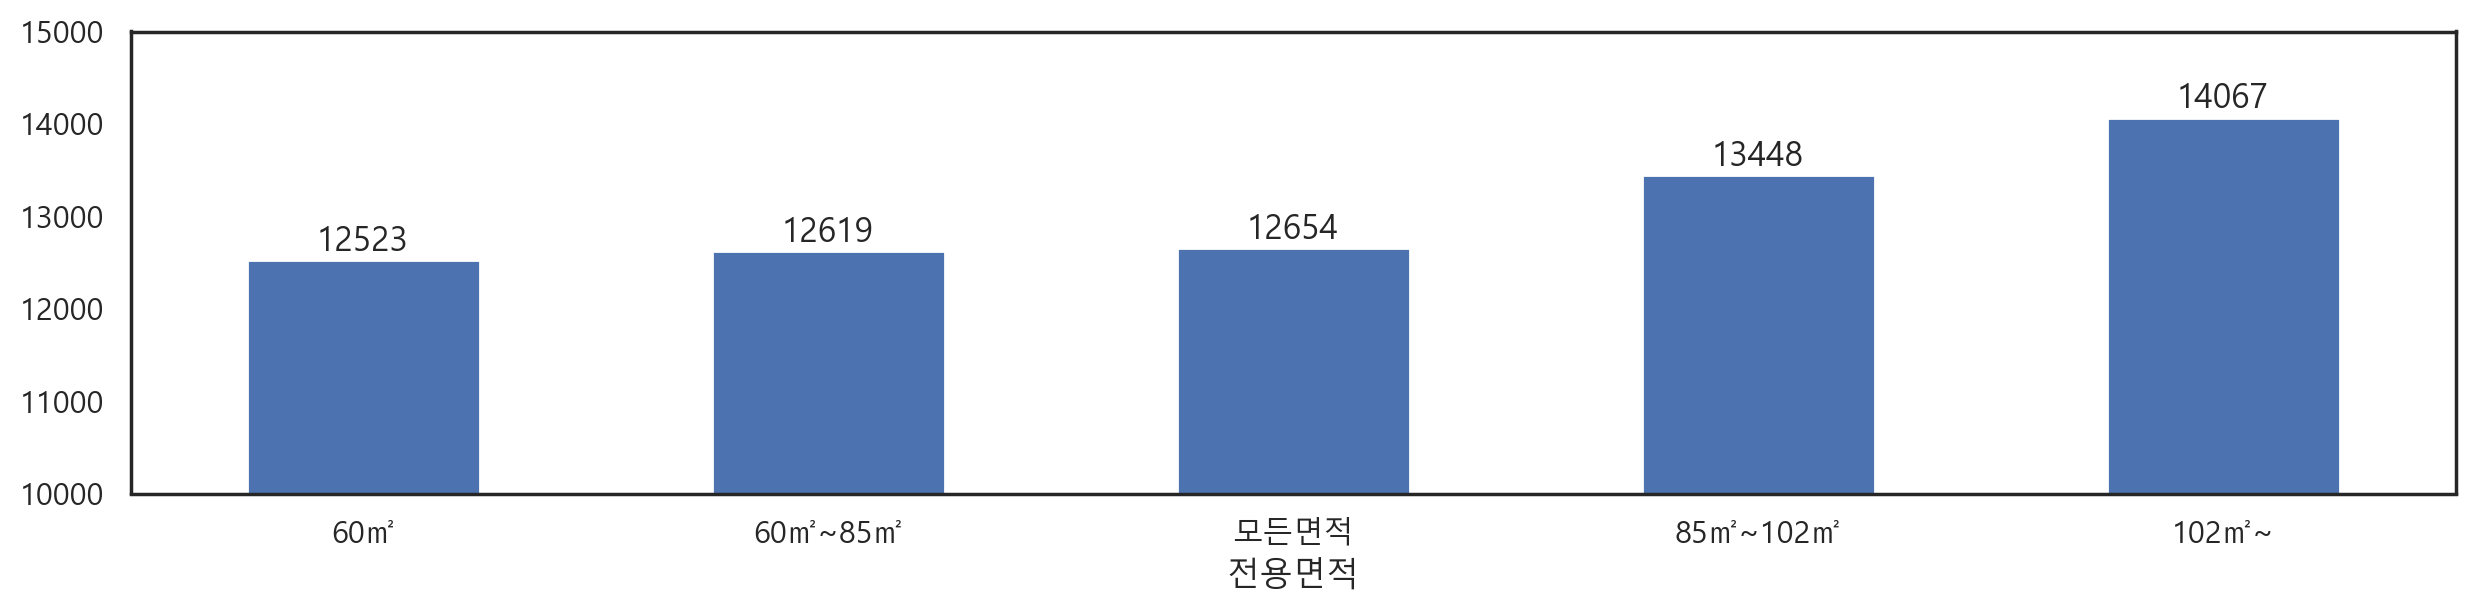

In [123]:
# result.plot.bar()
ax = result.plot(kind='bar', figsize=(15,3), rot=0)
ax.set_ylim([10000, 15000])

for idx, val in enumerate(result):
    ax.text(idx-0.1, val+100, round(val))

# ax.text(0-0.1, 12522+100, 12522)
# ax.text(4-0.1, 14066+100, 14066)

## (4) 연도별 평균 평당분양가격(line)

In [125]:
result = df_last.groupby('연도')['평당분양가격'].mean()
result

연도
2015     9202.735802
2016     9683.025000
2017    10372.928923
2018    10978.938411
2019    12188.293092
2020    13039.422449
2021    13636.022540
2022    14942.504494
2023    16890.920657
2024    18962.919231
Name: 평당분양가격, dtype: float64

In [128]:
for year, val in result.items():
    print(year, val)

2015 9202.735802469135
2016 9683.025
2017 10372.928923076923
2018 10978.938411316649
2019 12188.293092105261
2020 13039.42244897959
2021 13636.022539682539
2022 14942.504494382021
2023 16890.92065677966
2024 18962.91923076923


In [129]:
for year, val in zip(result.index, result):
    print(year, val)

2015 9202.735802469135
2016 9683.025
2017 10372.928923076923
2018 10978.938411316649
2019 12188.293092105261
2020 13039.42244897959
2021 13636.022539682539
2022 14942.504494382021
2023 16890.92065677966
2024 18962.91923076923


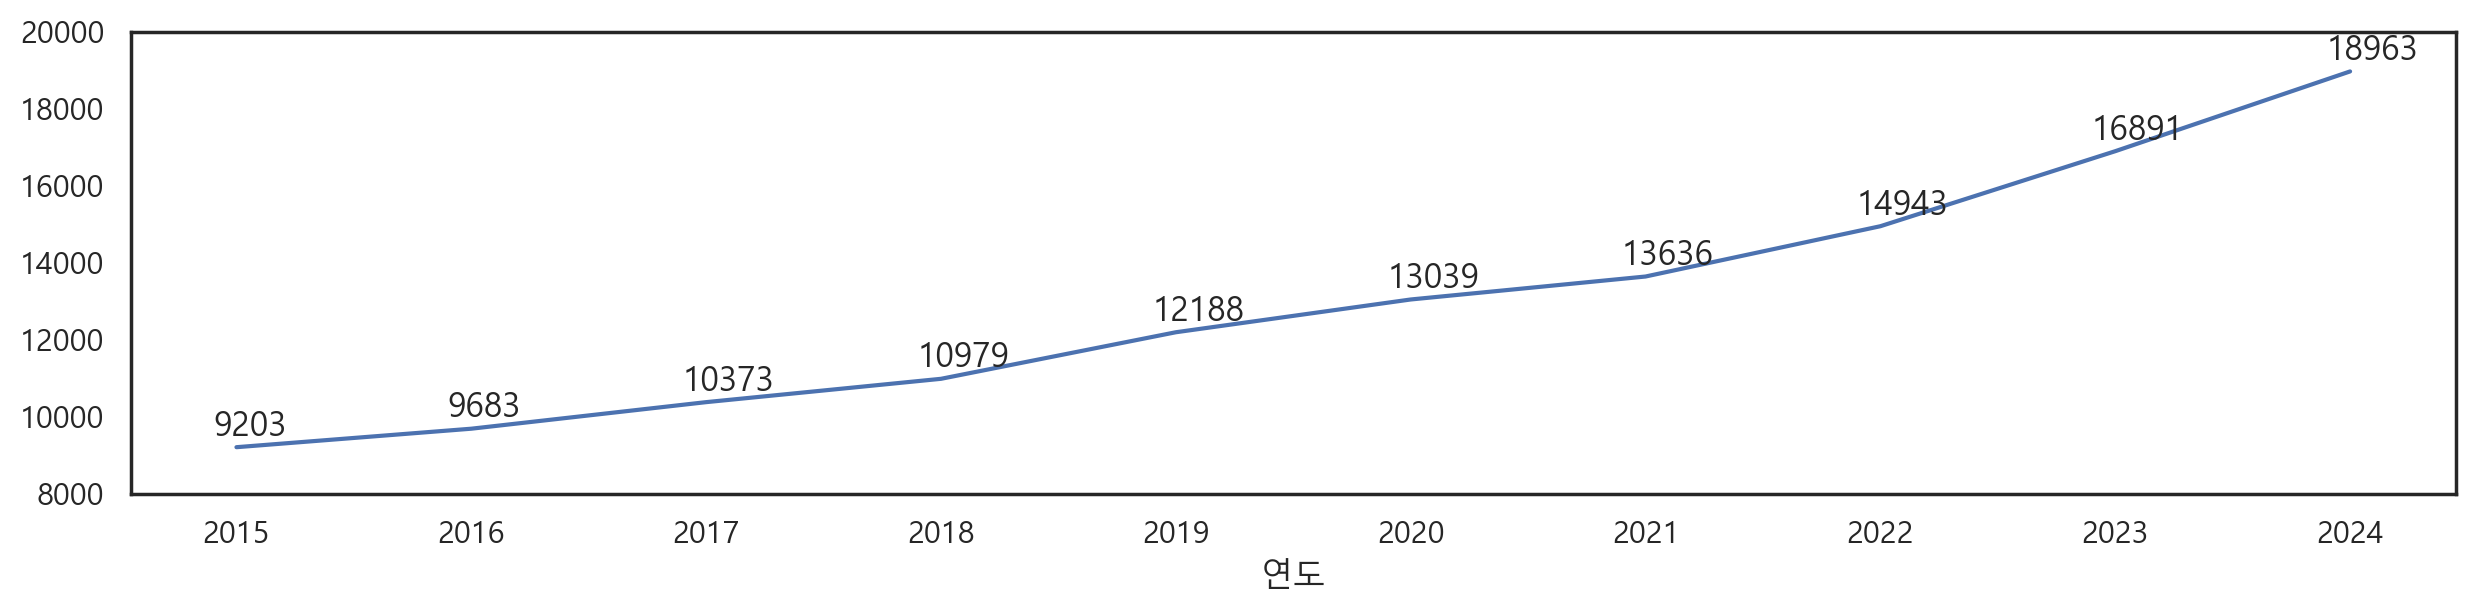

In [139]:
# result.plot.line()
result.plot(kind='line', figsize=(15,3))
plt.ylim([8000, 20000])
# plt.xlim([2015, 2025]) # x축의 구간
plt.xticks(range(2015,2025))

# plt.text(2015-0.1, 9202, 9202) for 문으로 구현
for year, val in result.items():
    plt.text(year-0.1, val+300, round(val))

plt.show()

범례:https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

# 9. seaborn으로 시각화
- 위에서 시각화한 내용을 seaborn으로 시각화

In [140]:
sns.set(style='white', rc={'figure.figsize':(9,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

## (1) 지역별 평당분양가격

<Axes: xlabel='지역명', ylabel='평당분양가격'>

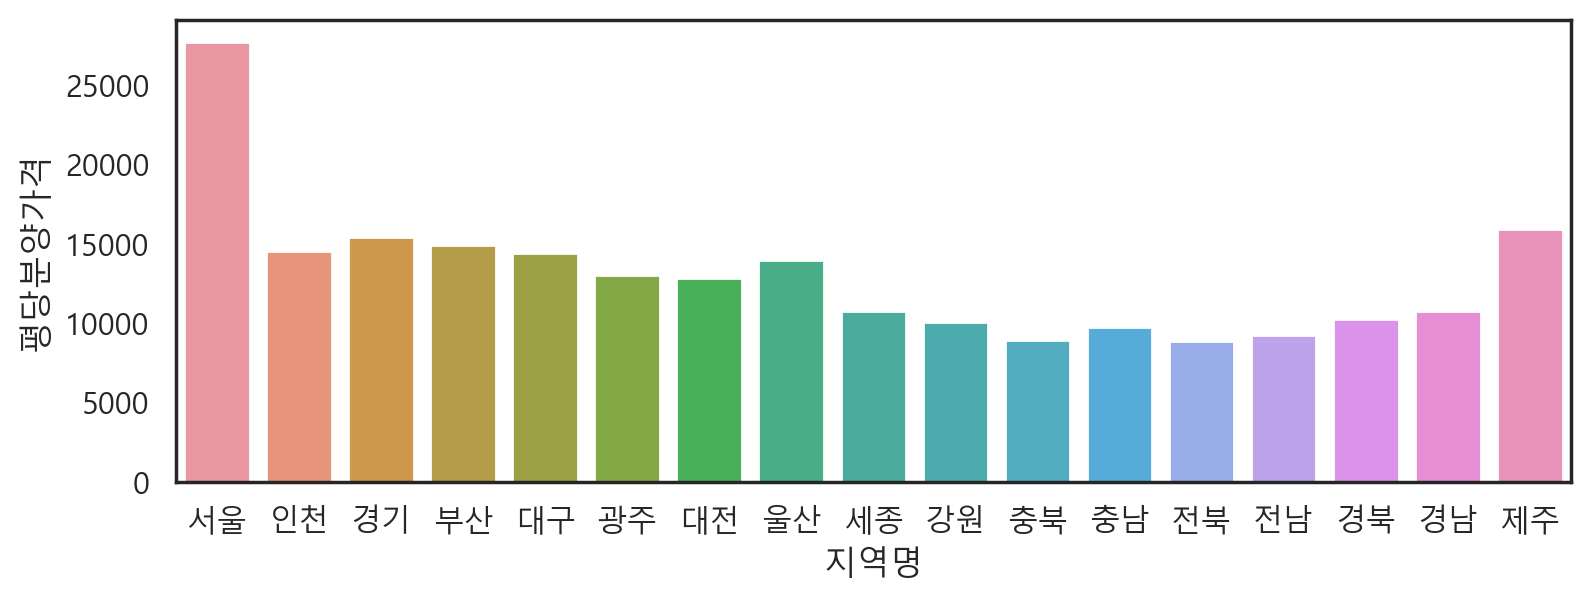

In [144]:
sns.barplot(data=df_last, x='지역명', y='평당분양가격',
            # errorbar=sd, 기본값은 95% 신뢰구간
            errorbar=None)

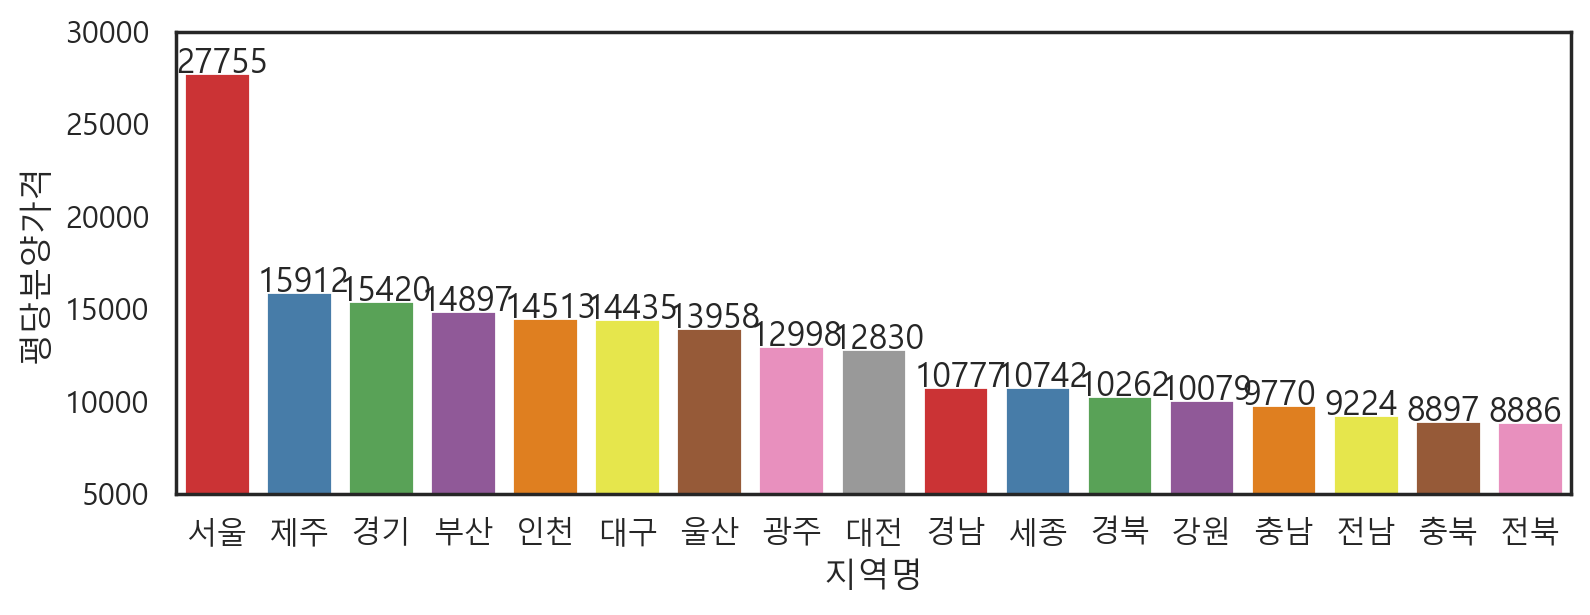

In [157]:
# 위 barplot + sort + 값annot
result = df_last.groupby('지역명')['평당분양가격'].mean().sort_values(ascending=False)
result.index
sns.barplot(data=df_last, x='지역명', y='평당분양가격',
            order=result.index,
            errorbar=None,
            palette='Set1')
for idx, val in enumerate(result):
    plt.text(idx-0.5, val, round(val))
    
plt.ylim([5000,30000])
plt.show()

In [151]:
for idx, val in enumerate(result):
    print(idx, val)

0 27755.404554079694
1 15912.434624145786
2 15420.03028037383
3 14896.949155722325
4 14513.23220338983
5 14434.519999999999
6 13958.197974683544
7 12998.215999999999
8 12829.565060240964
9 10776.95581395349
10 10741.830806845965
11 10261.553424657533
12 10078.71739961759
13 9769.541279069766
14 9224.326627218934
15 8896.58330206379
16 8886.201923076924


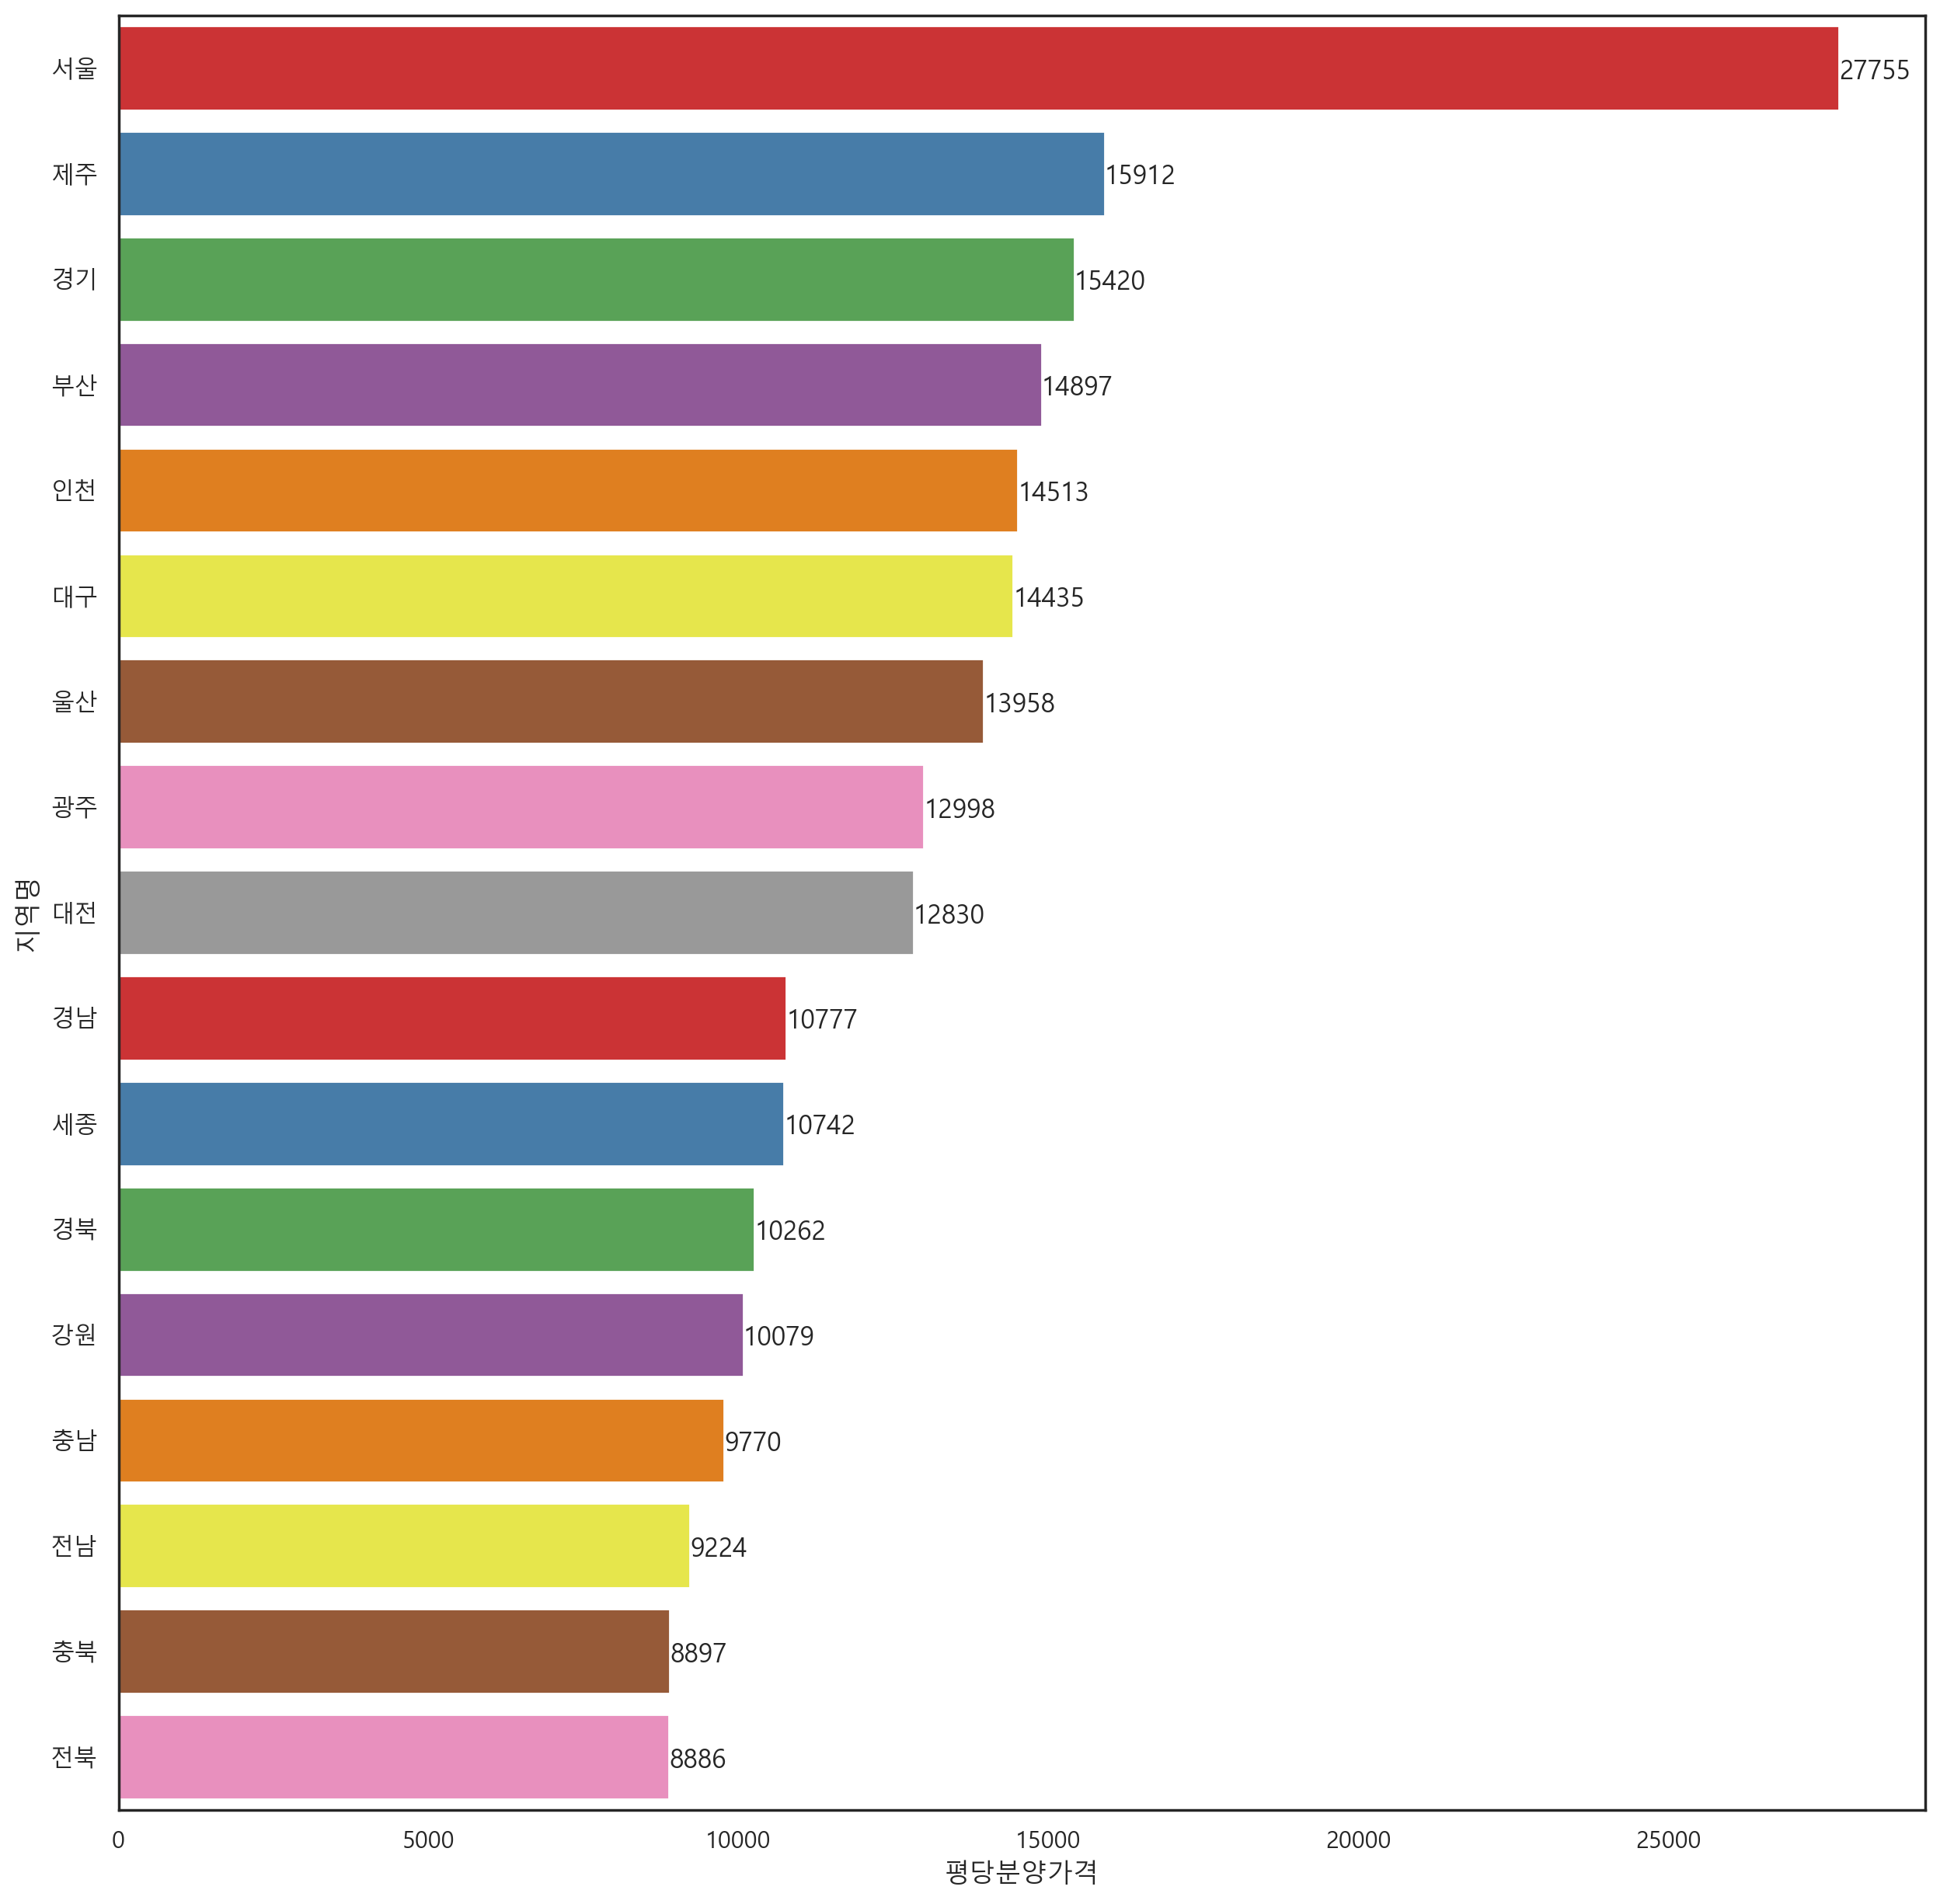

In [165]:
# 가로 barplot

plt.figure(figsize=(15,15))
sns.barplot(data=df_last, y='지역명', x='평당분양가격',
            order=result.index,
            errorbar=None,
            palette='Set1')
for idx, val in enumerate(result):
    plt.text(val, idx+0.1, round(val))
    

plt.show()

## (2) 연도별 평당분양가격

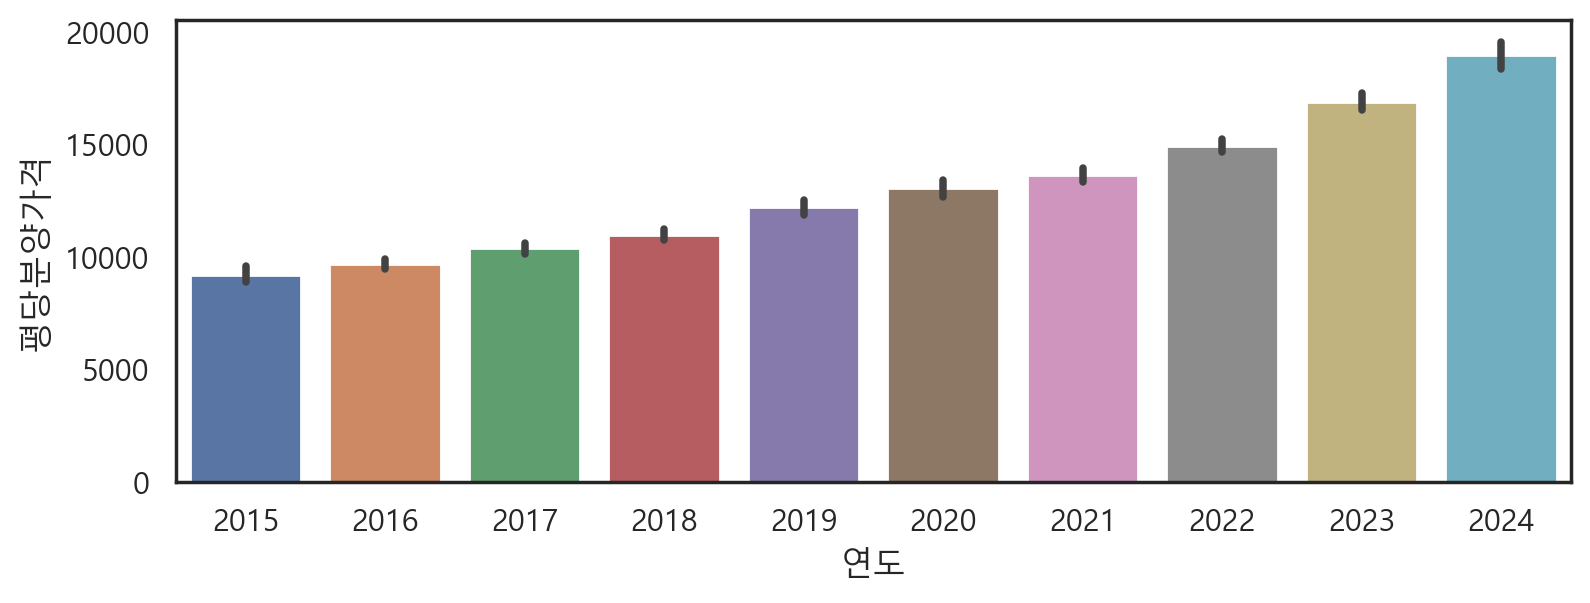

In [184]:
sns.barplot(data=df_last, x='연도', y='평당분양가격')
# sns.lineplot(data=df_last, x='연도', y='평당분양가격', color='k')
plt.show()

## (3) 그 외 lineplot, relplot, boxplot, violinplot, boxexplot, regplot, swarmplot

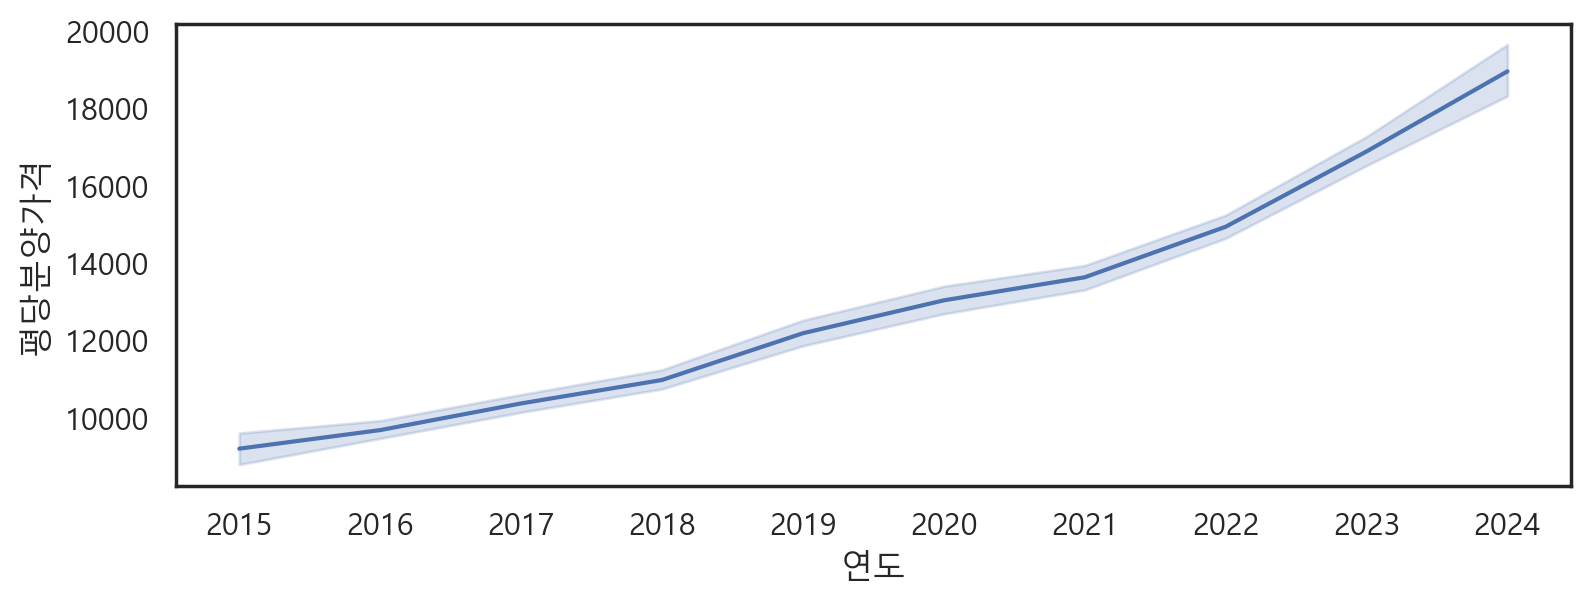

In [169]:
# 년도별 평당분양가격의 추이(lineplot)
sns.lineplot(data=df_last, x='연도', y='평당분양가격')
plt.xticks(range(2015, 2025))
plt.show()

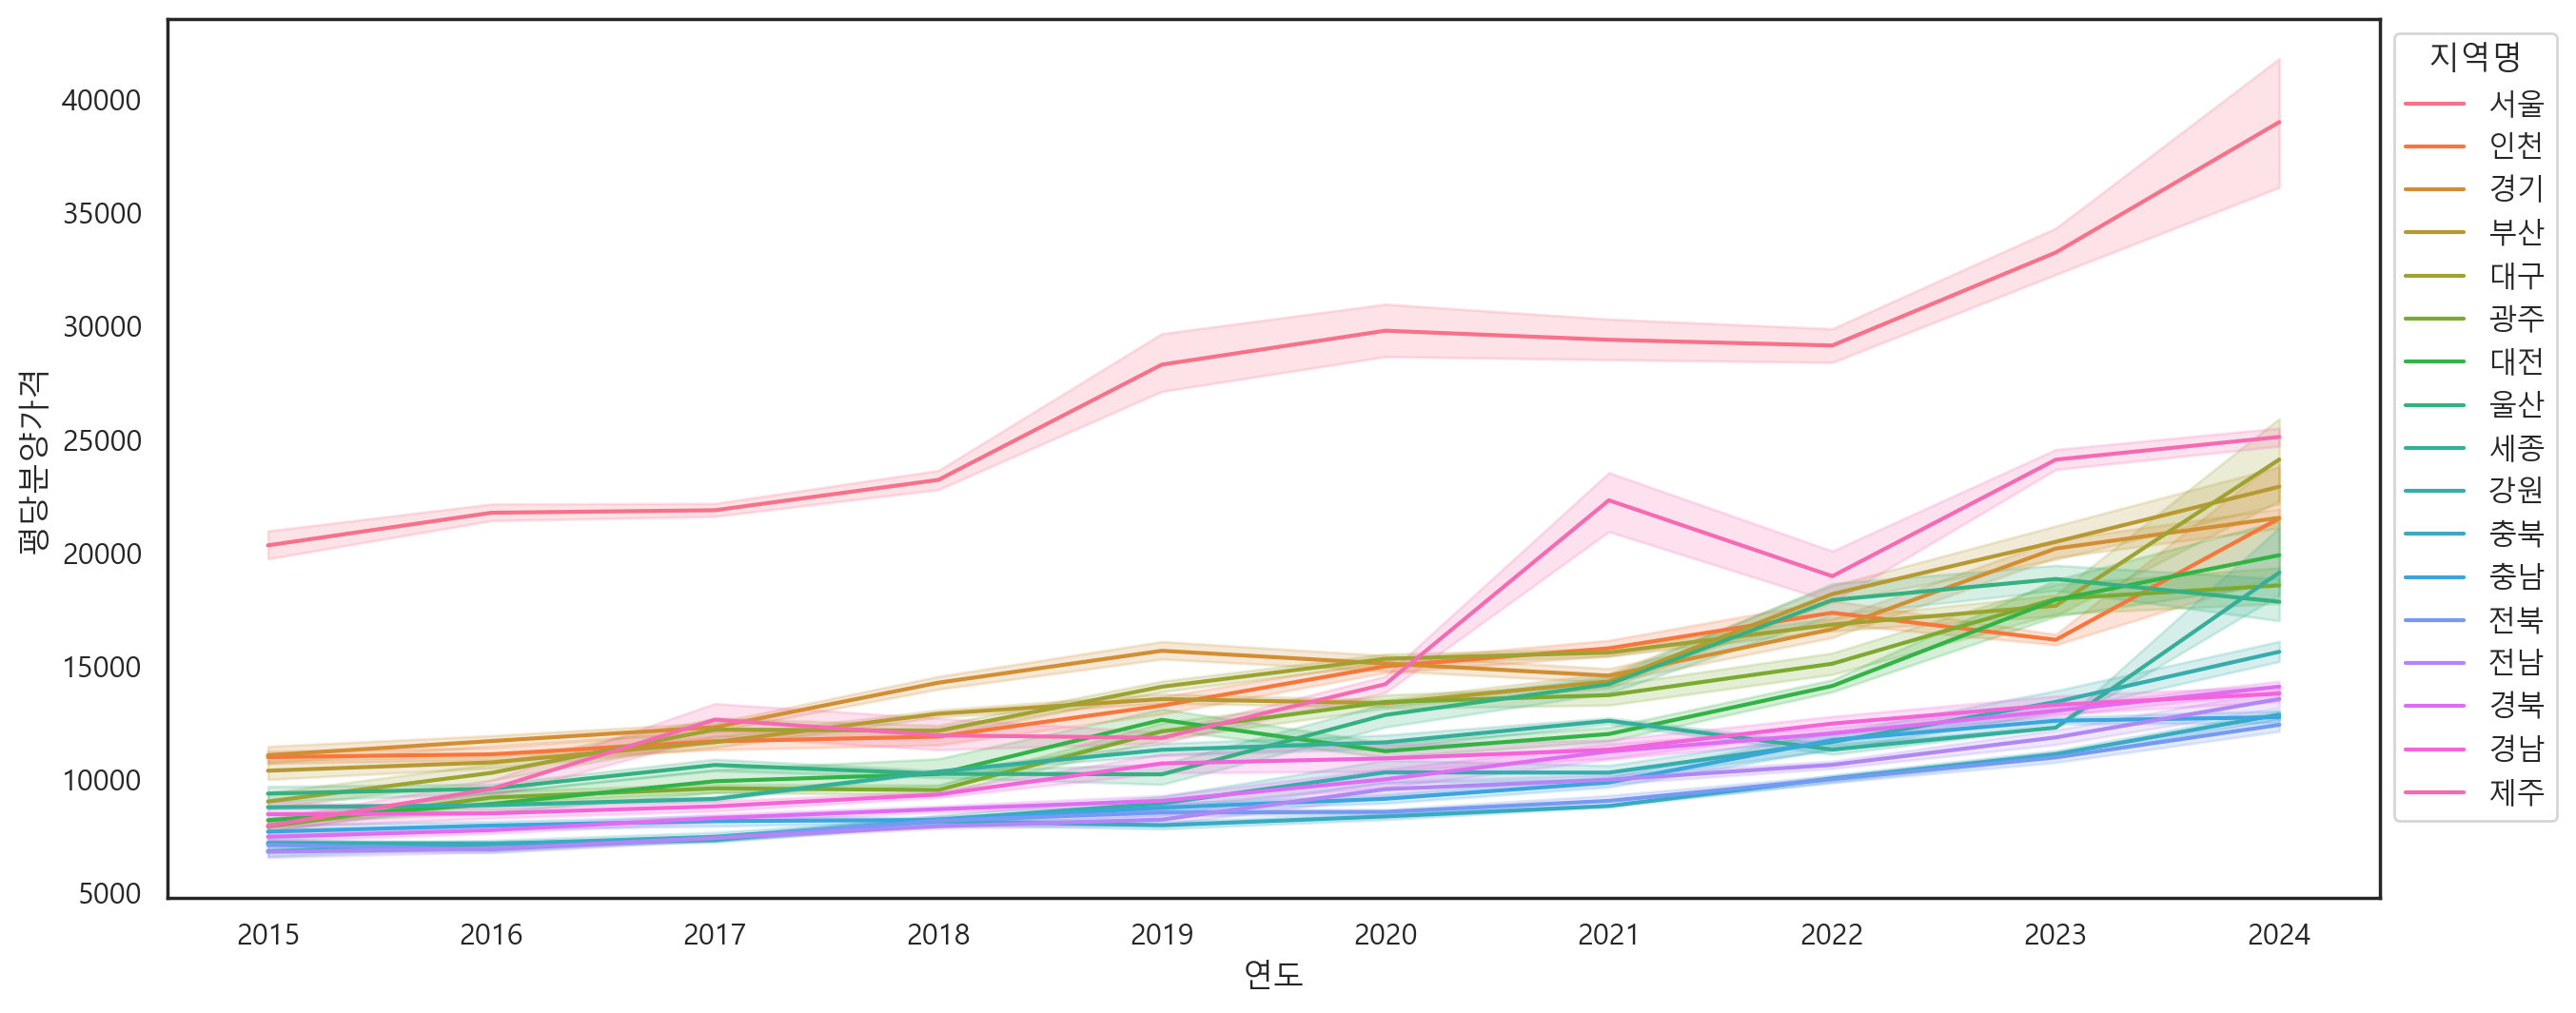

In [172]:
# 년도별 평당분양가격의 추이(lineplot) - 지역별
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=df_last, x='연도', y='평당분양가격', hue='지역명')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(range(2015, 2025))
plt.show()

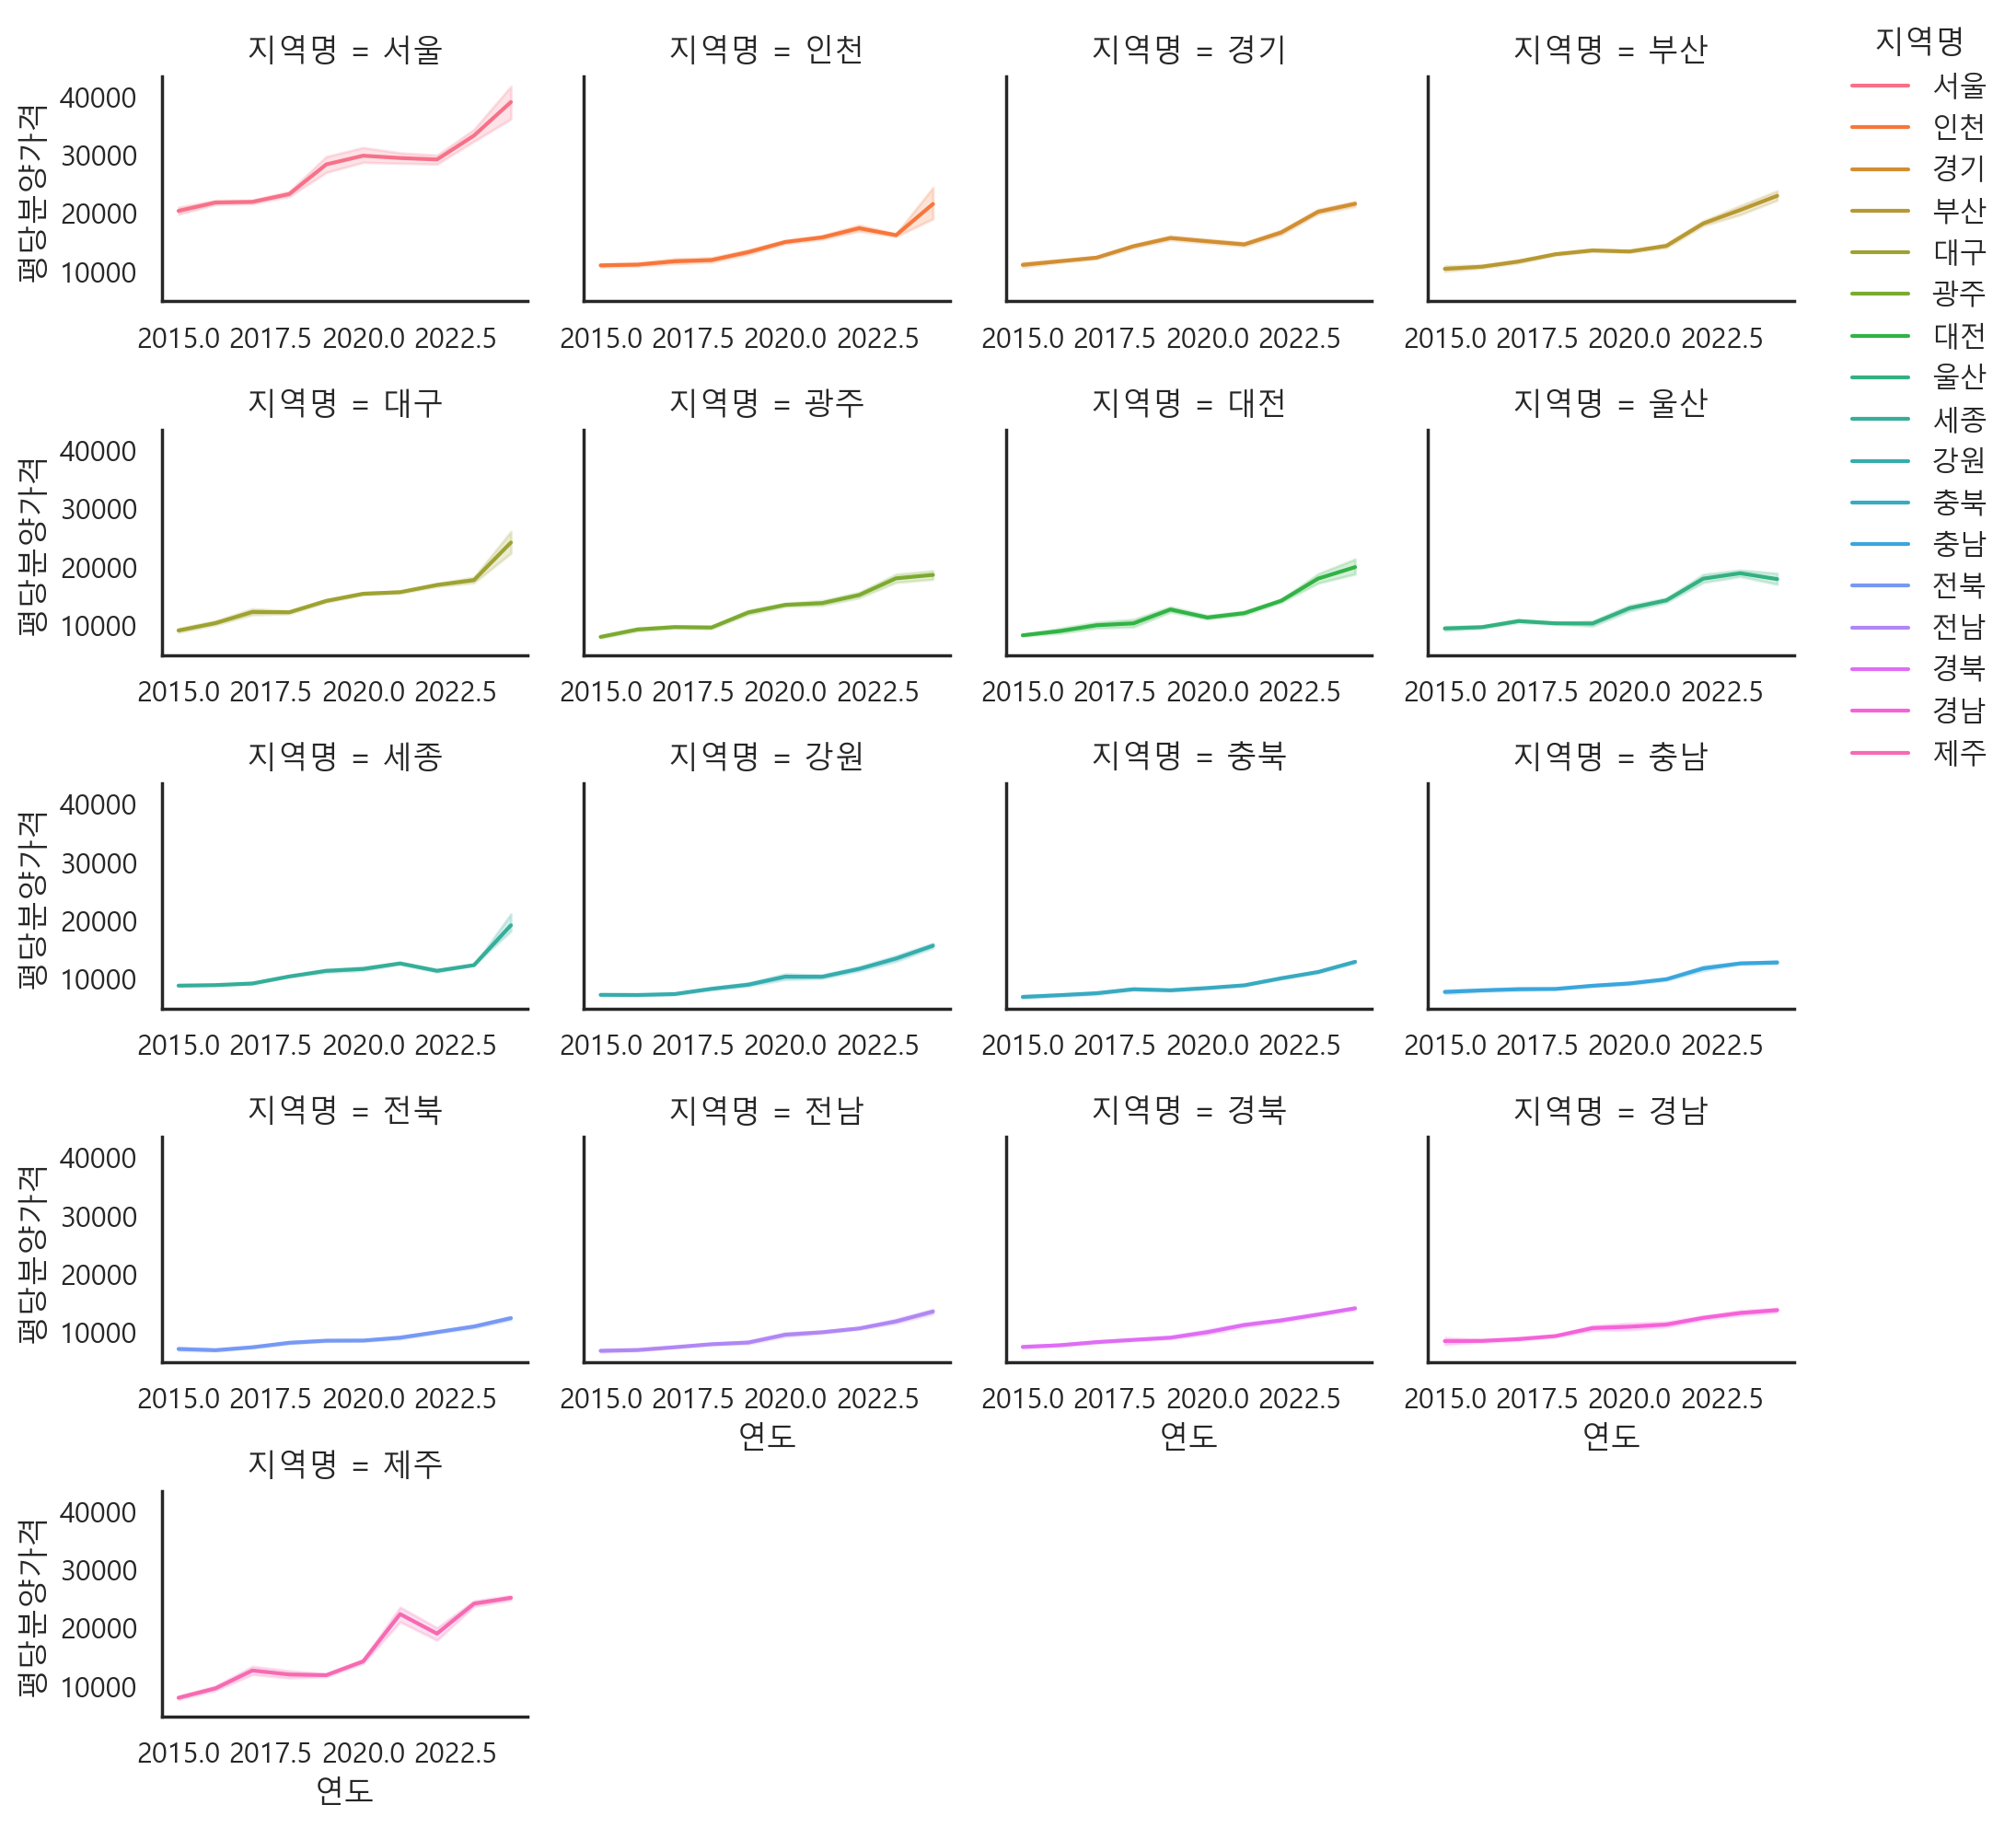

In [183]:
# 년도별 평당분양가격의 추이(lineplot) - 지역별 서브플롯
g = sns.relplot(data=df_last, x='연도', y='평당분양가격',
            hue='지역명',
            kind='line',
            col='지역명',
            col_wrap=4,
            facet_kws={'sharex':False, 'sharey':True}
            )
g.fig.set_size_inches(10,10) # 서브플롯 사이즈 조정
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout() # 서브플롯 레이아웃 타이트하게 조정

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


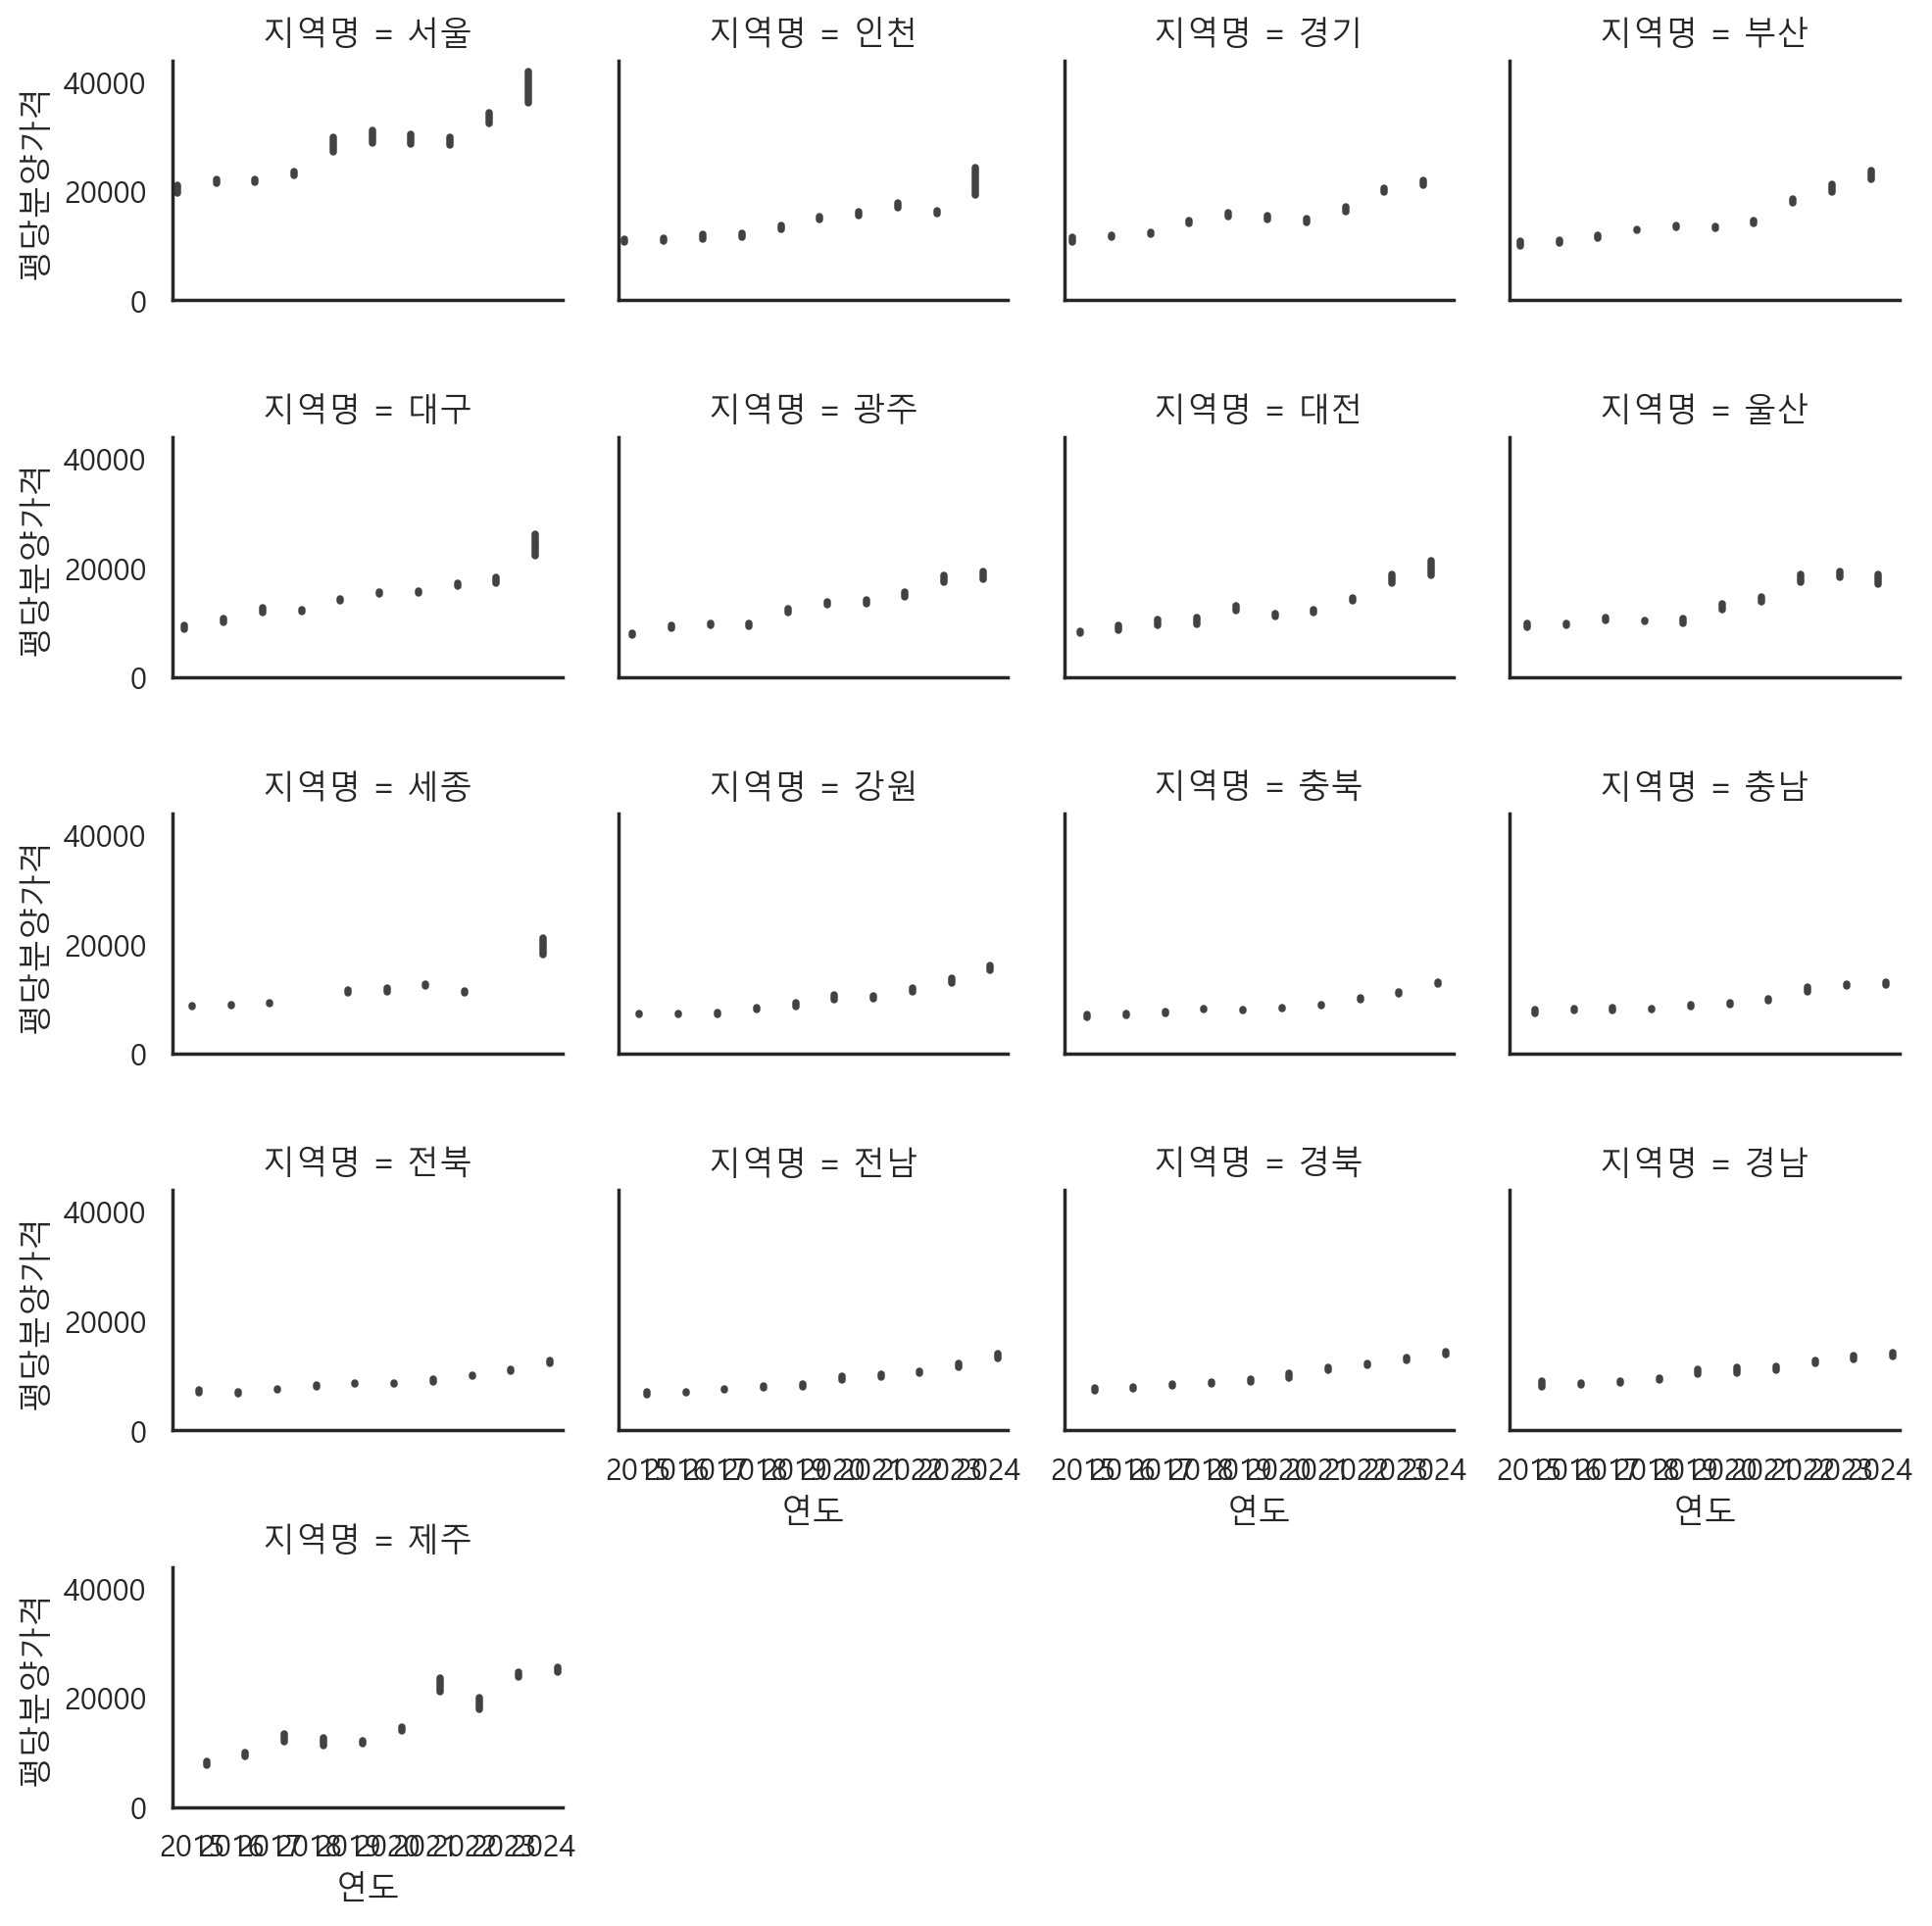

In [187]:
# 년도별 평당분양가격의 추이(lineplot) - 지역별 서브플롯
g = sns.catplot(data=df_last, x='연도', y='평당분양가격',
            hue='지역명',
            kind='bar',
            col='지역명',
            col_wrap=4,
            facet_kws={'sharex':False, 'sharey':True}
            )
g.fig.set_size_inches(10,10) # 서브플롯 사이즈 조정

plt.tight_layout() # 서브플롯 레이아웃 타이트하게 조정

<Axes: xlabel='연도', ylabel='평당분양가격'>

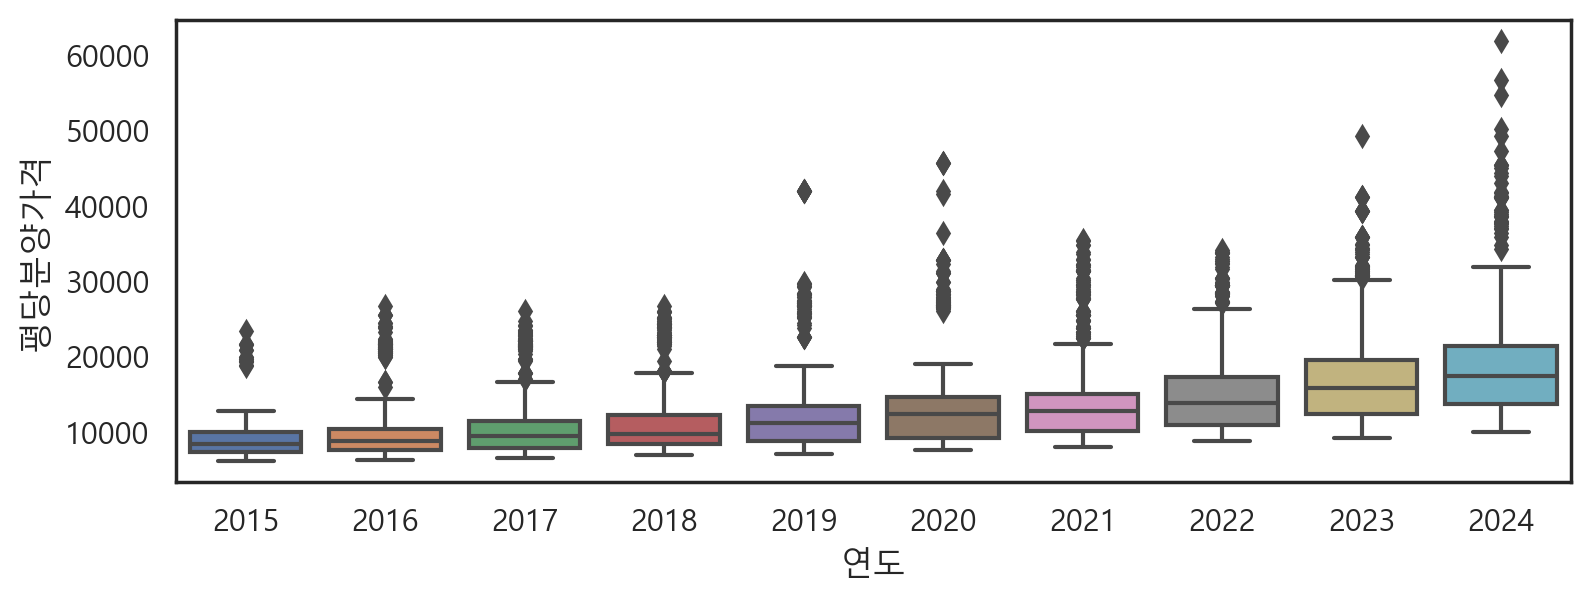

In [188]:
sns.boxplot(data=df_last, x='연도', y='평당분양가격')

<Axes: xlabel='연도', ylabel='평당분양가격'>

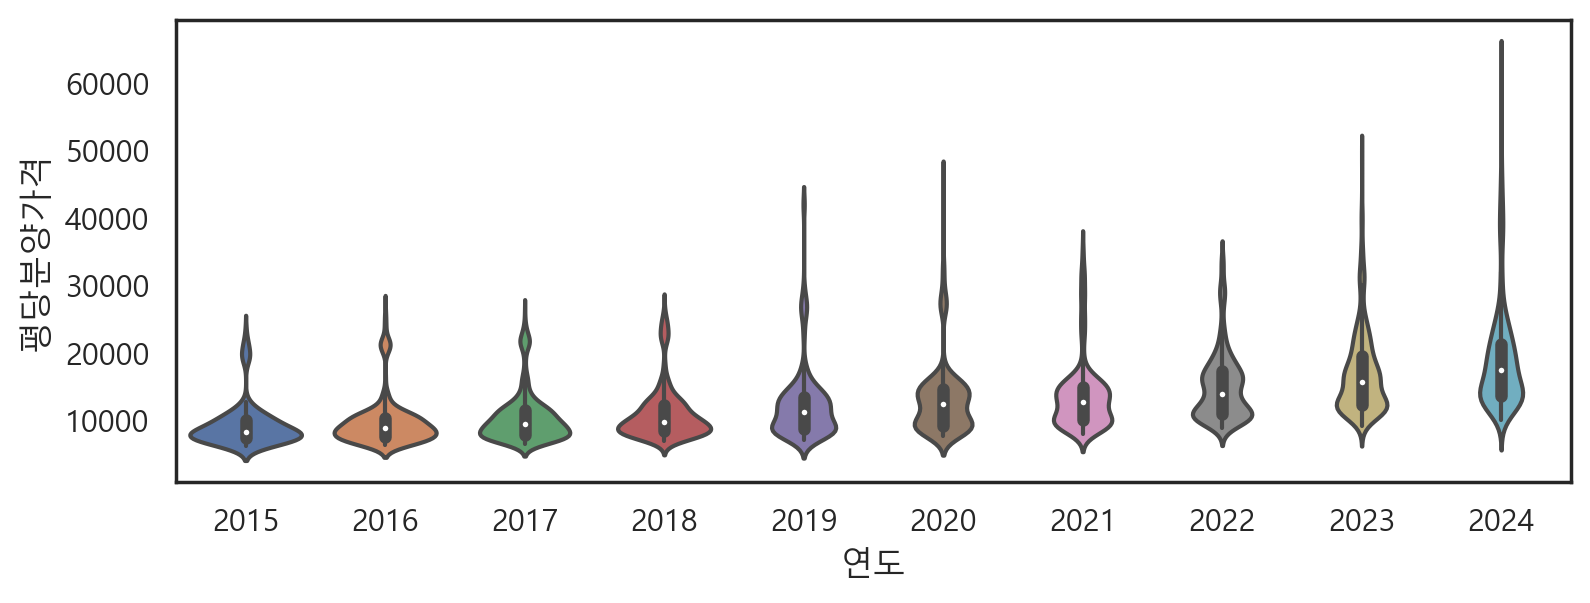

In [189]:
sns.violinplot(data=df_last, x='연도', y='평당분양가격')

<Axes: xlabel='연도', ylabel='평당분양가격'>

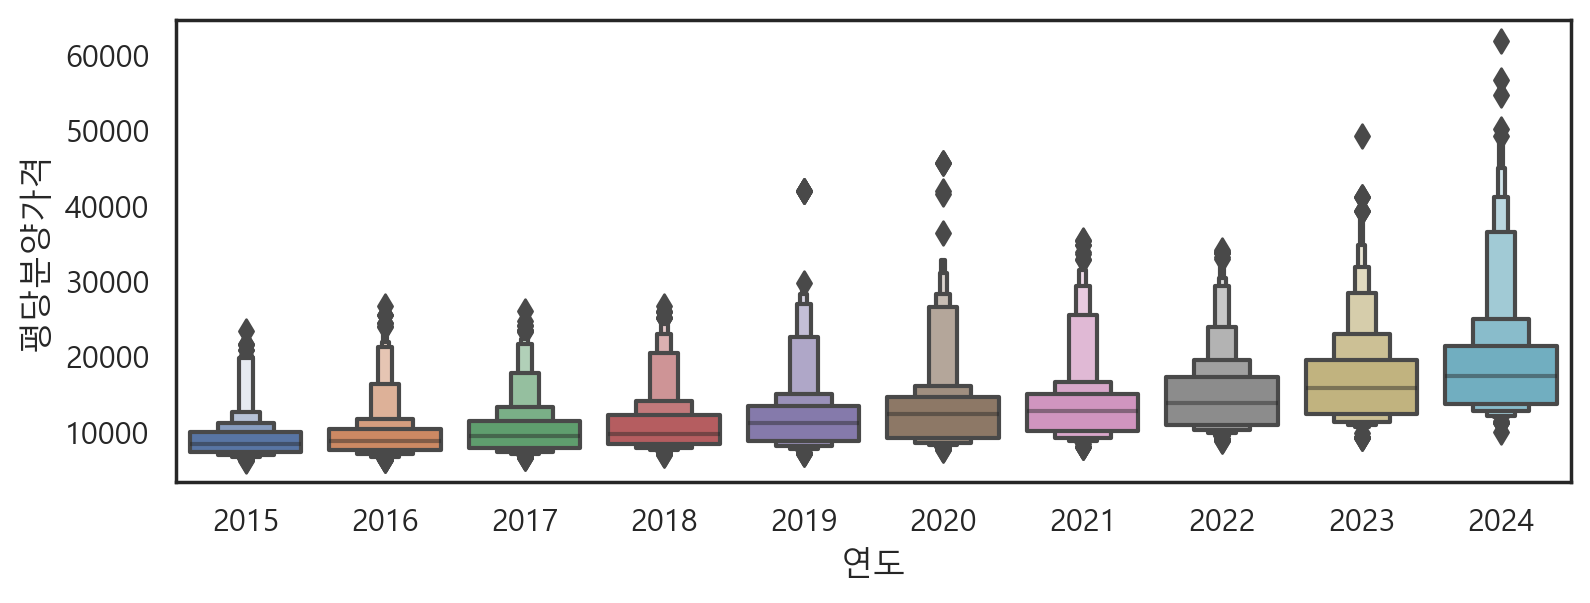

In [190]:
sns.boxenplot(data=df_last, x='연도', y='평당분양가격')

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용(교안 20page)

# 10. 구조가 다른 df_first와 df_last를 연결 후 분석
## (1) concat
- new_first :df_first를 [지역명, 연도, 월, 평당분양가격]으로 변환
- new_last : df_last를 [지역명, 연도, 월, 평당분양가격]으로 변환
                (전용면적이 모든면적인 행만 추출후, 전용면적 열을 삭제)

## (2) 결측치 대체(연도별, 지역별 중위값)

## (3) df.csv파일로 출력

## (4) 7절부터 9절까지 분석을 한다(전용면적별 분석은 불가)

- 지역명별 데이터 갯수는 결측치가 없어서 동일(groupby나 pivot_table등으로 확인)
- 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)
- 연도별 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)

### ① 지역명별 데이터 행 갯수 : 결과가 1차원 시리즈

### ② 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [77]:
# 지역명당 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ③ 연도별 평당분양가격(평균)

In [78]:
# 연도별 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ④ 연도, 지역별 평당분양가격(평균)

In [79]:
# 연도별, 지역별 평당분양가격 시각화(heatmap)

In [80]:
# 년도별 평균 평당분양가격의 추이

In [81]:
# 위의 그래프가 겹쳐서 작 보이지 않아 분리

In [82]:
# 관계형 그래프의 서브플롯을 그리는 함수는 relplot
# 범주형 그래프의 서브플롯을 그리는 함수는 catplot

In [83]:
# 연도별 평당분양가격의 사분위수


In [84]:
# 연도별 평당분양가격의 사분위수(분포포함 boxenplot)


In [85]:
# 연도별 평당분양가격의 사분위수(분포포함 violinplot)


In [86]:
# 연도에 따른 평당분양가격을 회귀식으로 시각화


In [87]:
# swarmplot은 많은 데이터를 그리기에는 시간이 많이 걸려 5%만 sampling후 그릴 것을 추천
# 연도별 평당분양가격 산점도
 

In [88]:
# 분양가격을 hist
